In [12]:
#This program extracts the core spectral data from a data cube. Hopefully this doesnt take forever
# For parallelization, which helps to make convolution faster
import dask
dask.config.set(scheduler = 'threads', num_workers = 8)
from dask.diagnostics import ProgressBar
ProgressBar().register()
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import regions
import os.path

from astropy import units as u

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/smoothed_cubes_K/'

# J = 2-1

all = ["87_spw25",
"89_spw27",
"91_spw25",
"93_spw27",
"95_spw25",
"97_spw27",
"98_spw29",
"99_spw31",
"102_spw23",
"102_spw29",
"103_spw31",
"106_spw29",
"107_spw31",
"110_spw29",
"111_spw31",
"112_spw27",
"114_spw29",
"129_spw67",
"130_spw105",
"132_spw107",
"134_spw45",
"135_spw47",
"137_spw85",
"137_spw69",
"139_spw71",
"140_spw109",
"142_spw111",
"144_spw49",
"146_spw51",
"147_spw89",
"149_spw91",
"142_spw27",
"152_spw31",
"244_spw65",
"245_spw67",
"247_spw105",
"249_spw107",
"250_spw25",
"252_spw27",
"254_spw85",
"255_spw87",
"259_spw47",
"258_spw69",
"259_spw71",
"261_spw109",
"263_spw111",
"264_spw29",
"266_spw31",
"270_spw91",
"271_spw49",
"273_spw51",
"127_spw65",
"257_spw45",
"268_spw89"]


from spectral_cube import SpectralCube
cubeList = []
for freq_spw in all:
    if(os.path.exists(results+'source_ab_'+freq_spw+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image.commonbeam.K.fits')):
        cube = SpectralCube.read(results+'source_ab_'+freq_spw+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image.commonbeam.K.fits', use_dask = True)
        cubeList.append(cube)


# Extract spectrum for a coordinate in central core region
from astropy import coordinates
crd = coordinates.SkyCoord("17:46:10.63 -28:42:17.8", frame='fk5', unit=(u.h, u.deg))

import os
from spectral_cube import OneDSpectrum
from astropy.io import fits

max_spectra = []

# # Failed attempt to write spectra to disk so I don't have to generate them anymore (July 28, 2022):
# for i, cube in enumerate(resampled_ch3cn_subcubes):
#     outfile = freq_spws[i]+"_core_spectrum.fits"
#     if not os.path.exists(outfile):
#         x, y = map(int, cube.wcs.celestial.world_to_pixel(crd))
#         spectrum = cube[:, y, x].to(u.K)
#         spectrum.write(outfile, format='fits')  
#     else:
#         spectrum = OneDSpectrum.from_hdu(fits.open(outfile)).to(u.K)
#         print(spectrum)
#     max_spectra.append(spectrum)
#     print("Finished with a spectrum!")

for c in cubeList:
    x, y = map(int, c.wcs.celestial.world_to_pixel(crd))
    spectrum = c[:, y, x].to(u.K)
    max_spectra.append(spectrum)
    print("Finished with a spectrum!")
    # Whyyyyy the hell does it take multiple minutes to extract spectra, all_spectra_and_models can do it so damn fast


[########################################] | 100% Completed | 101.23 ms
[########################################] | 100% Completed | 201.21 ms
[########################################] | 100% Completed | 301.20 ms
[########################################] | 100% Completed | 100.68 ms
[########################################] | 100% Completed | 200.84 ms
[########################################] | 100% Completed | 201.38 ms
Finished with a spectrum!
[########################################] | 100% Completed | 100.76 ms
[########################################] | 100% Completed | 201.38 ms
[########################################] | 100% Completed | 301.20 ms
[########################################] | 100% Completed | 101.18 ms
[########################################] | 100% Completed | 201.19 ms
[########################################] | 100% Completed | 201.62 ms
Finished with a spectrum!
[########################################] | 100% Completed | 100.74 ms
[###########

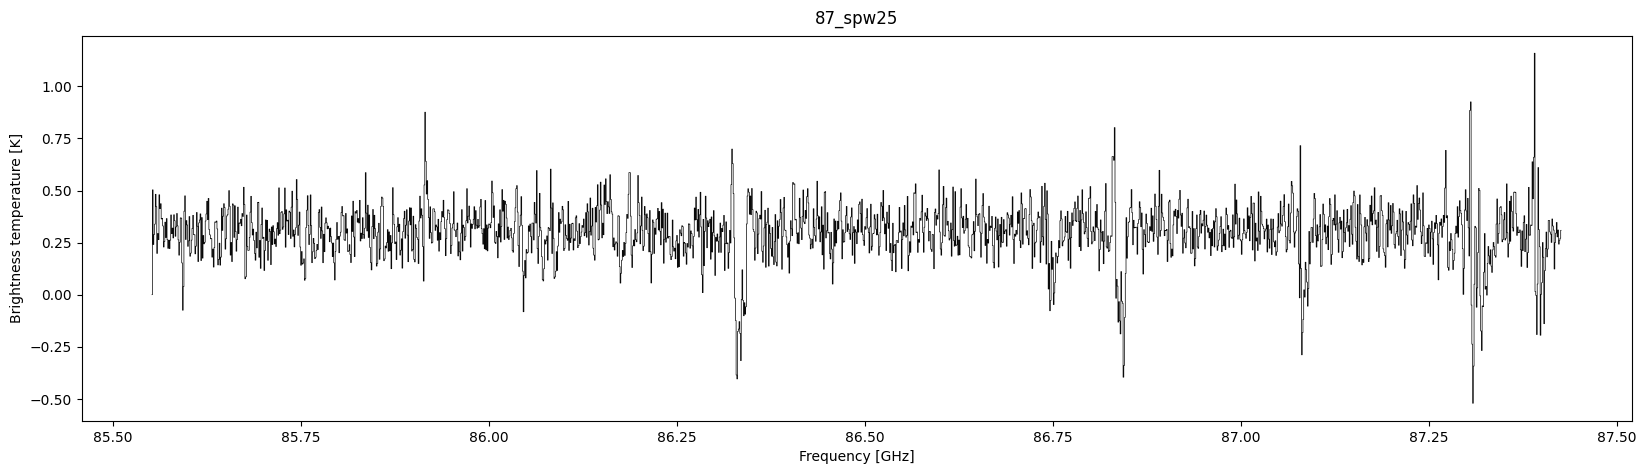

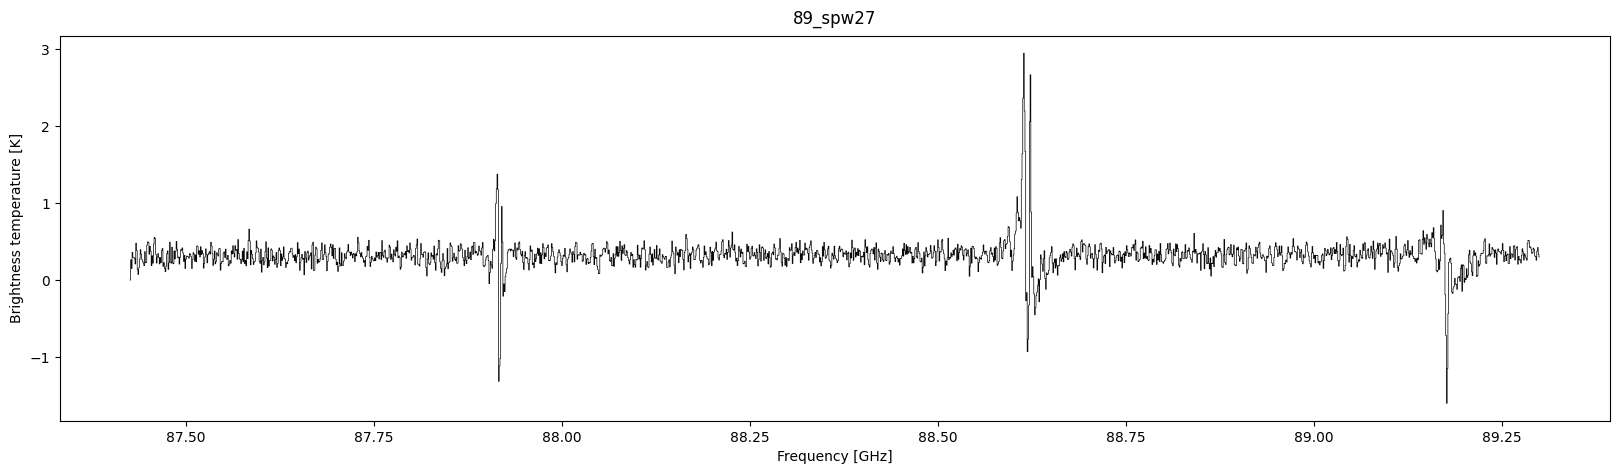

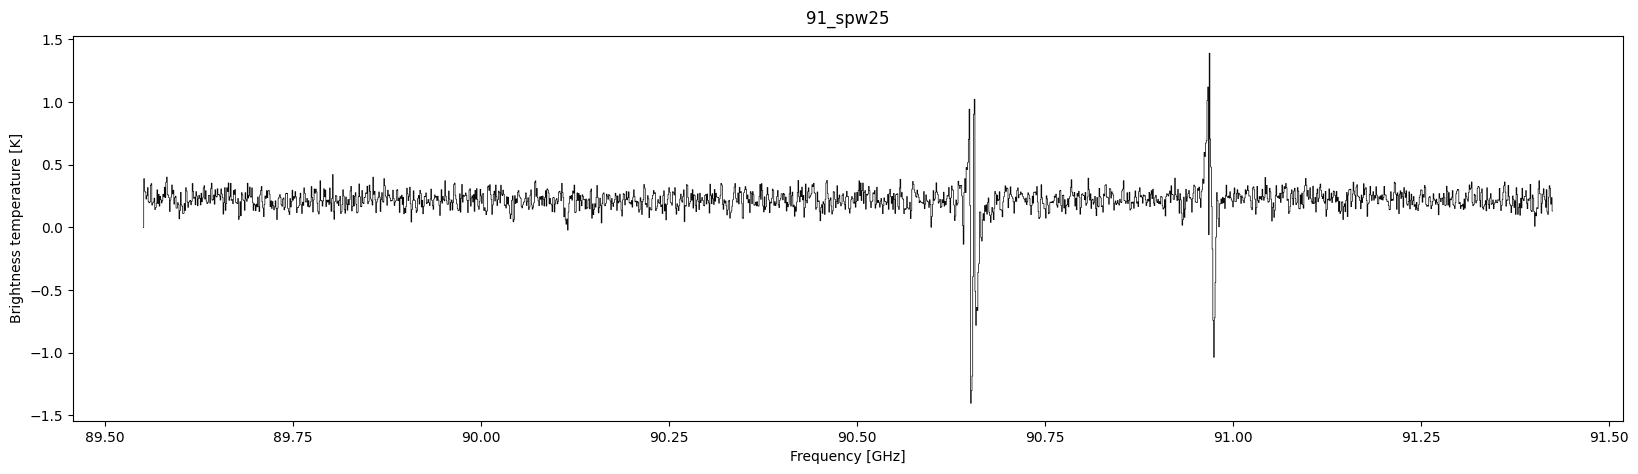

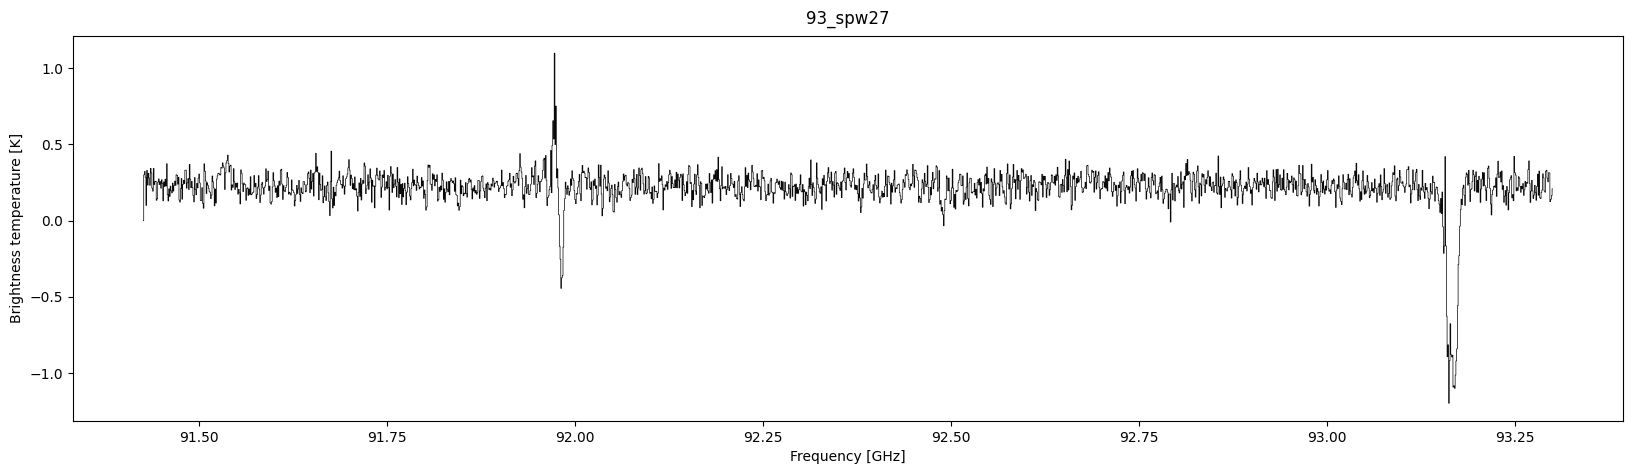

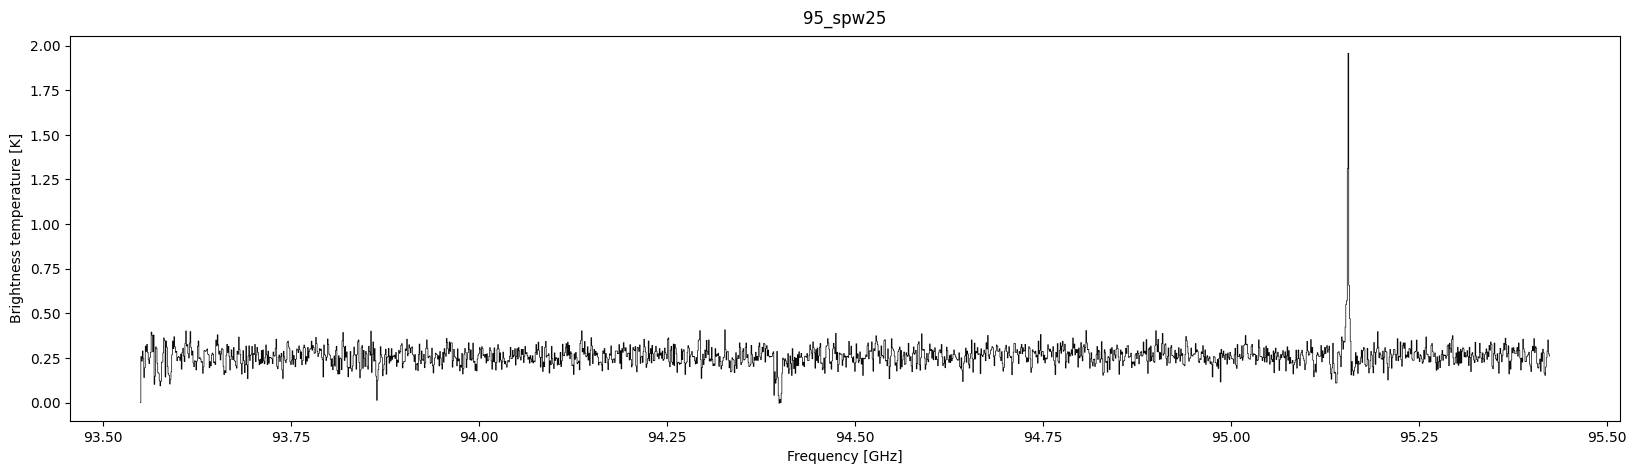

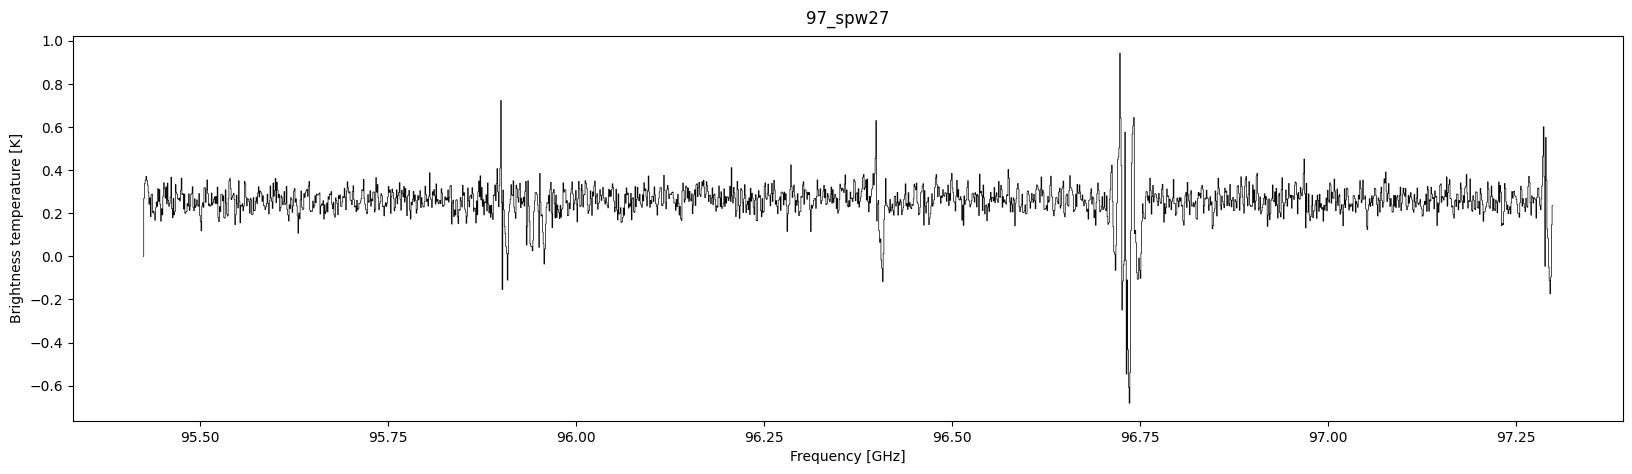

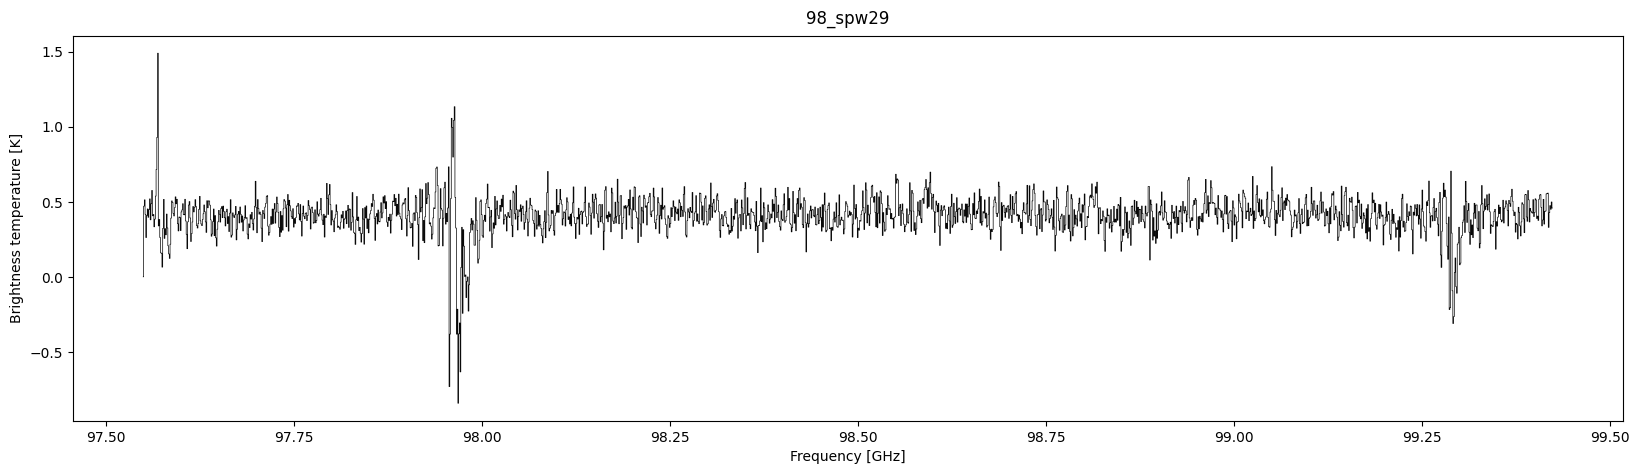

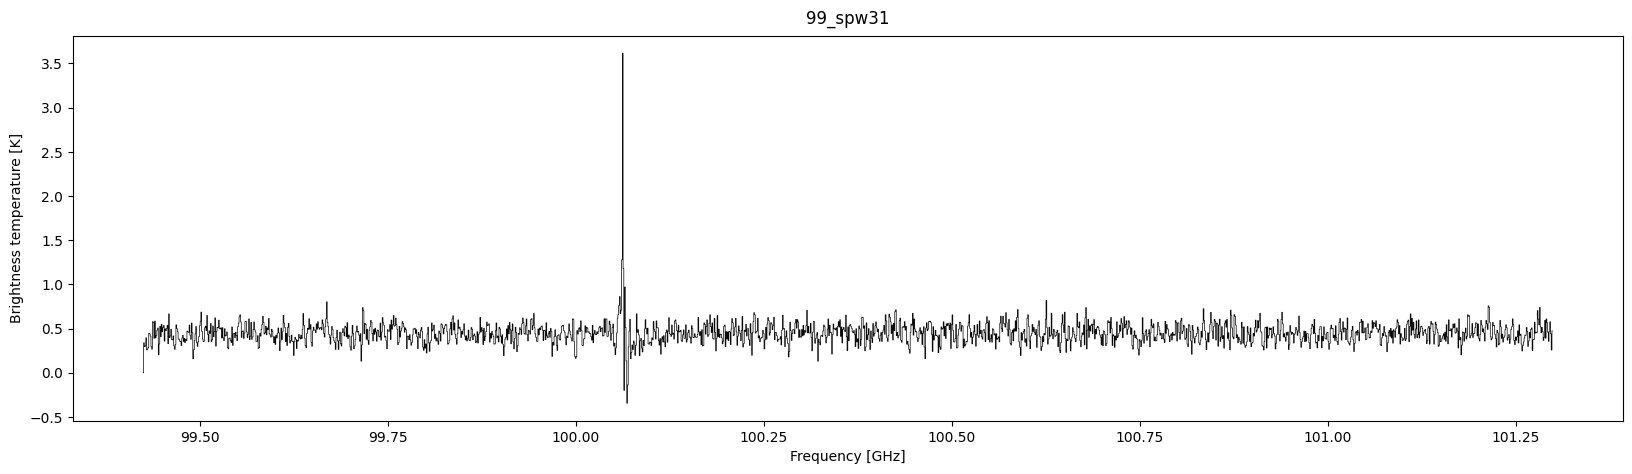

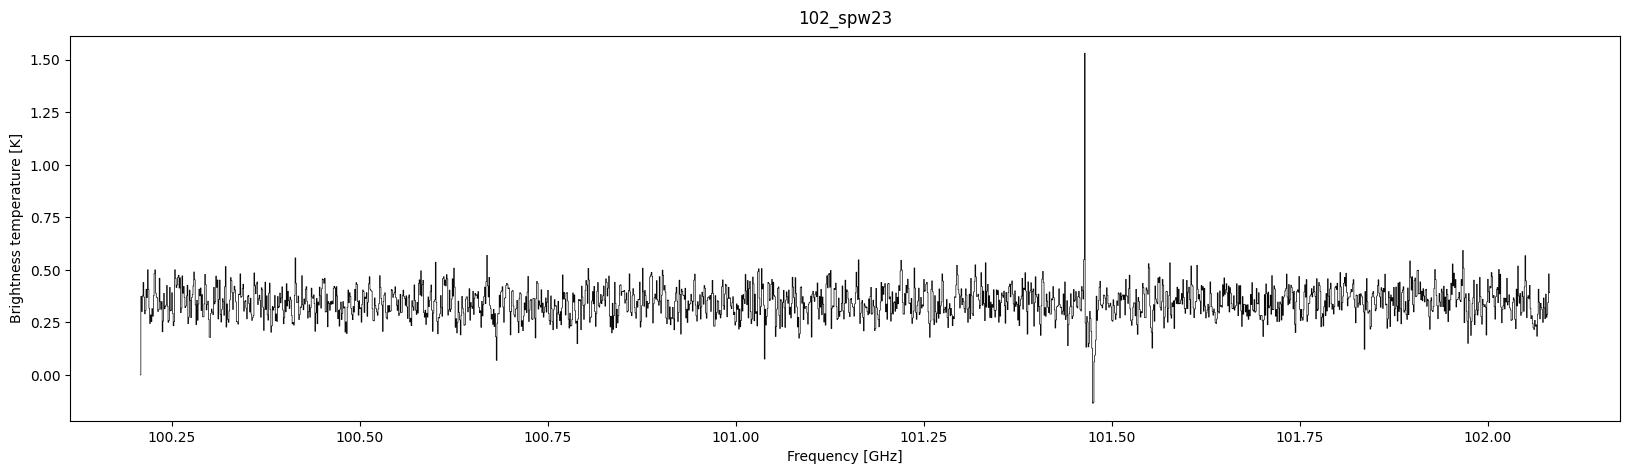

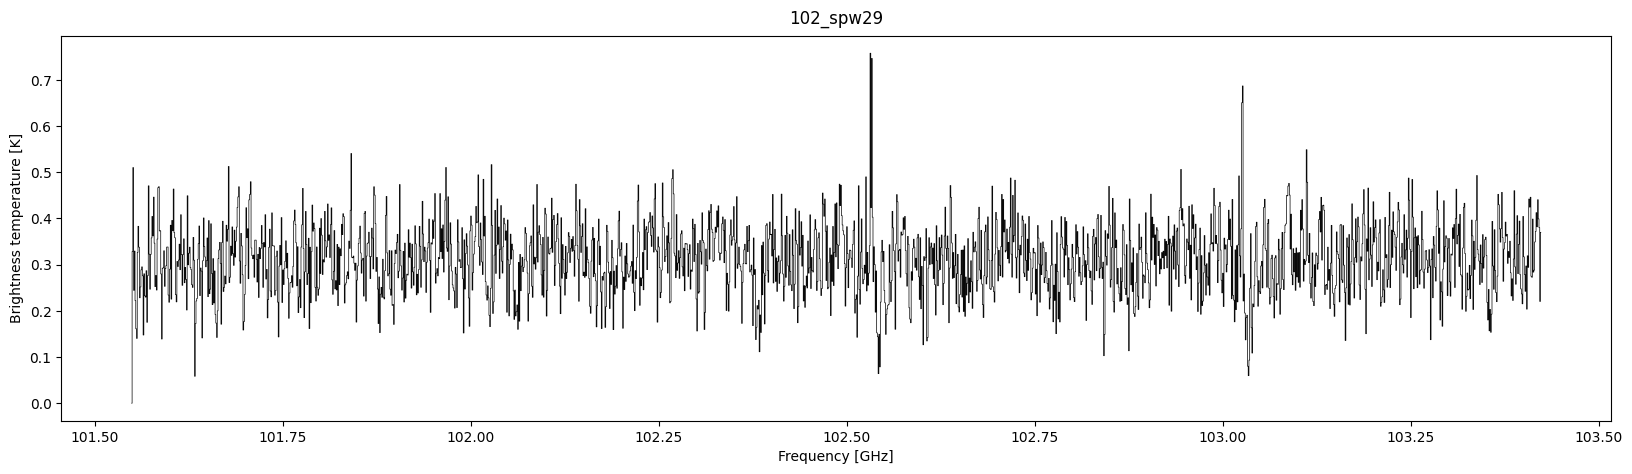

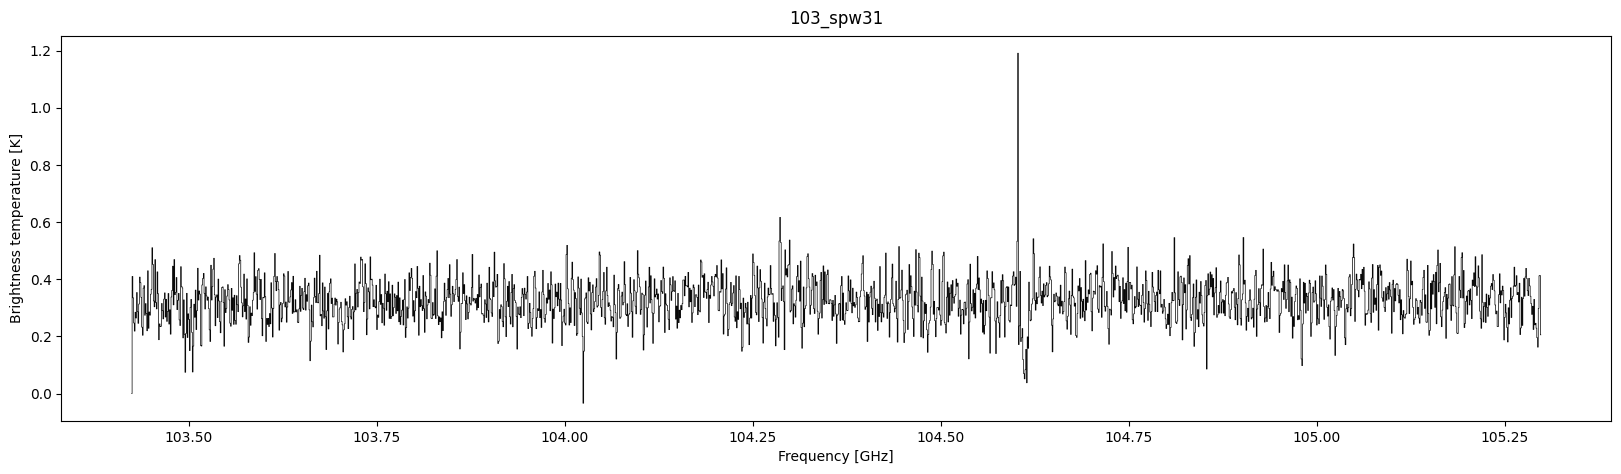

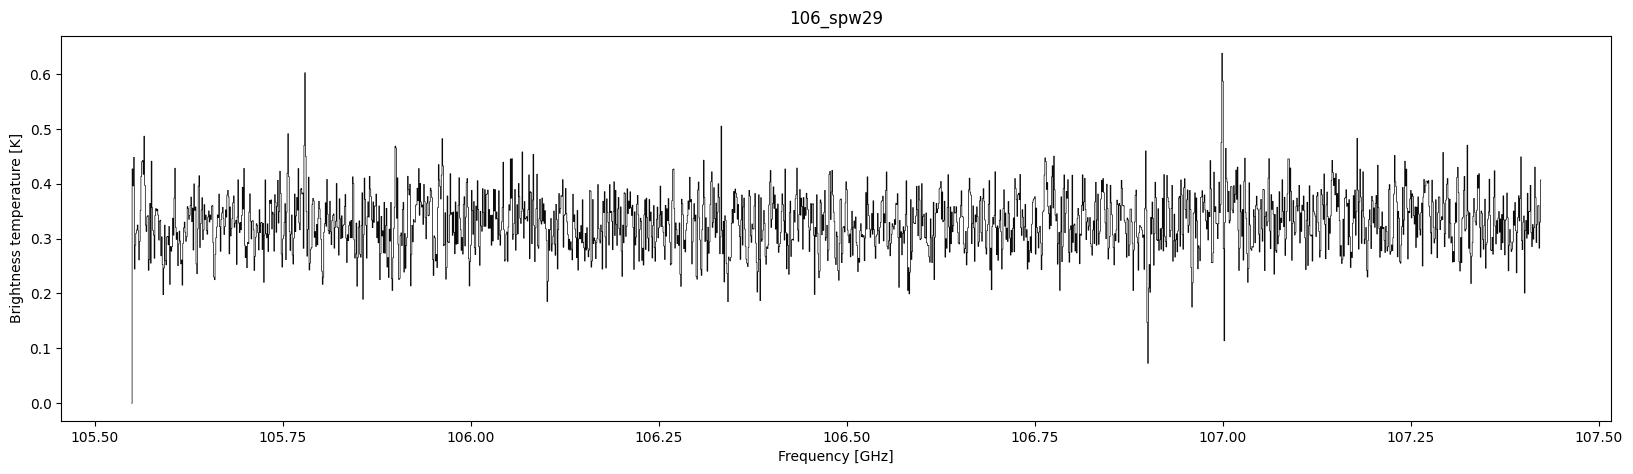

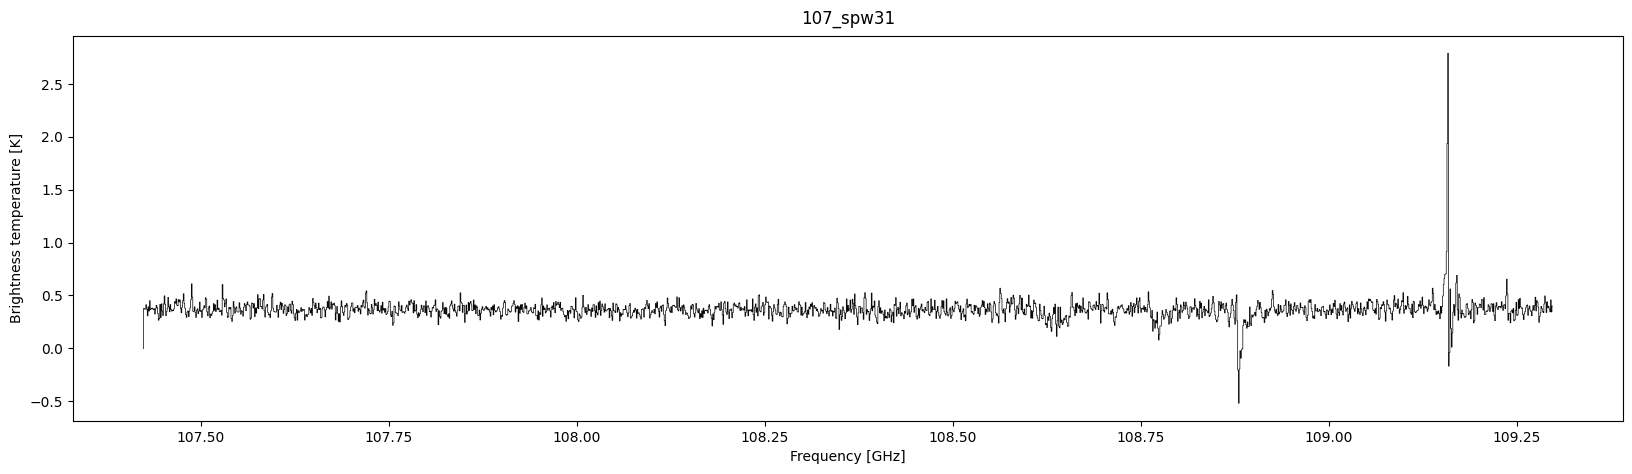

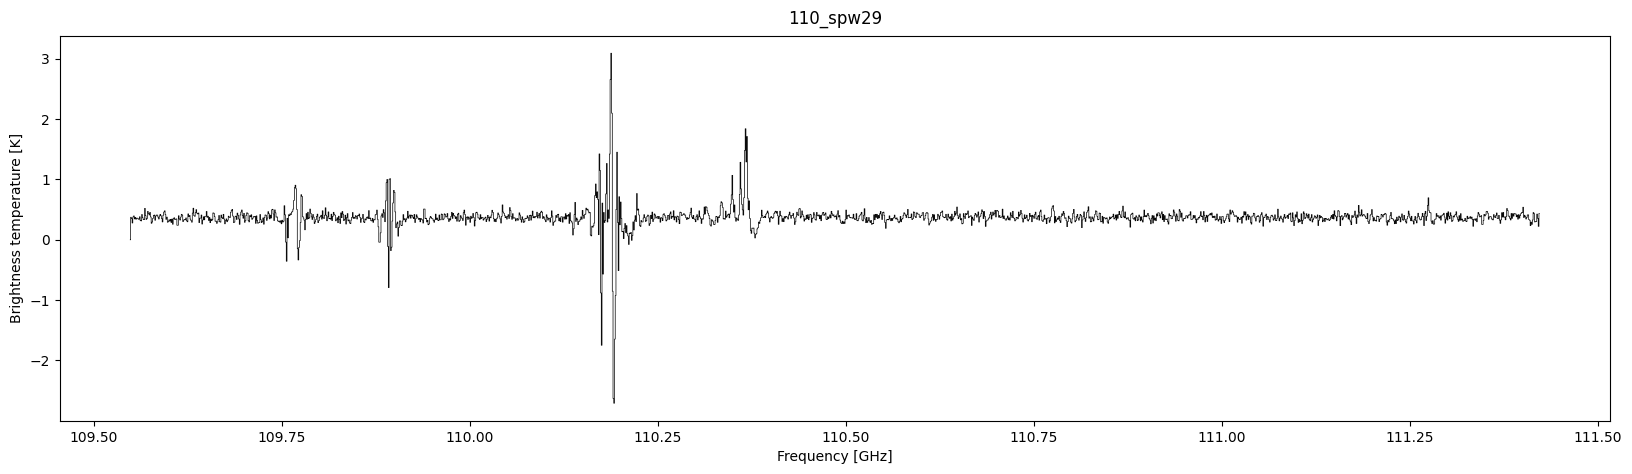

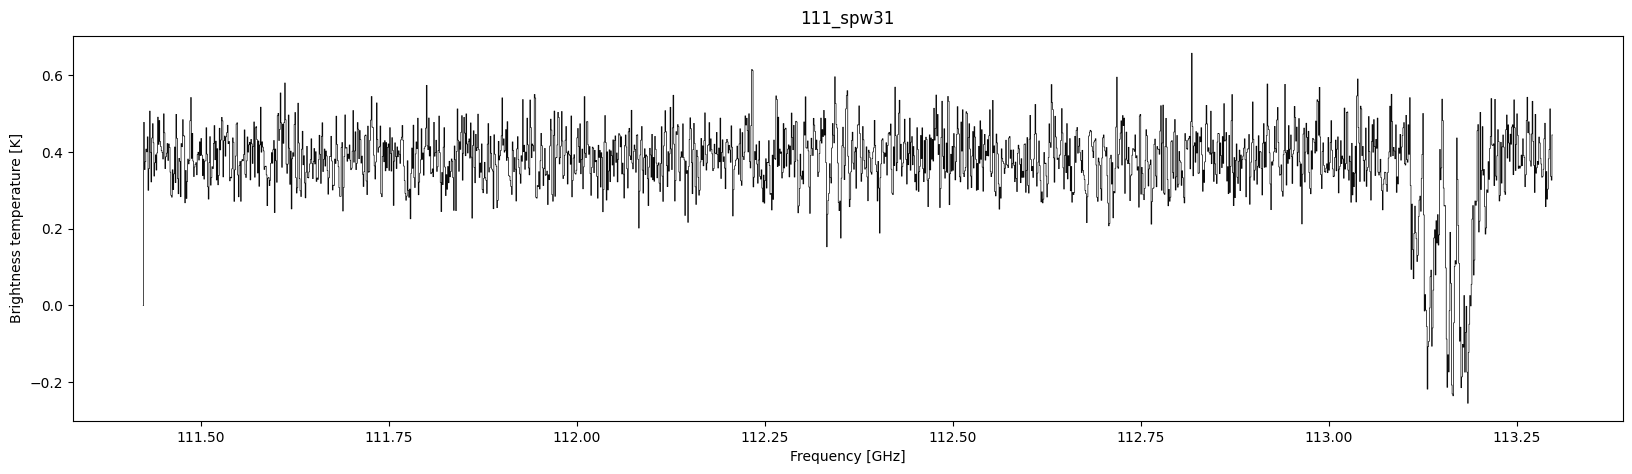

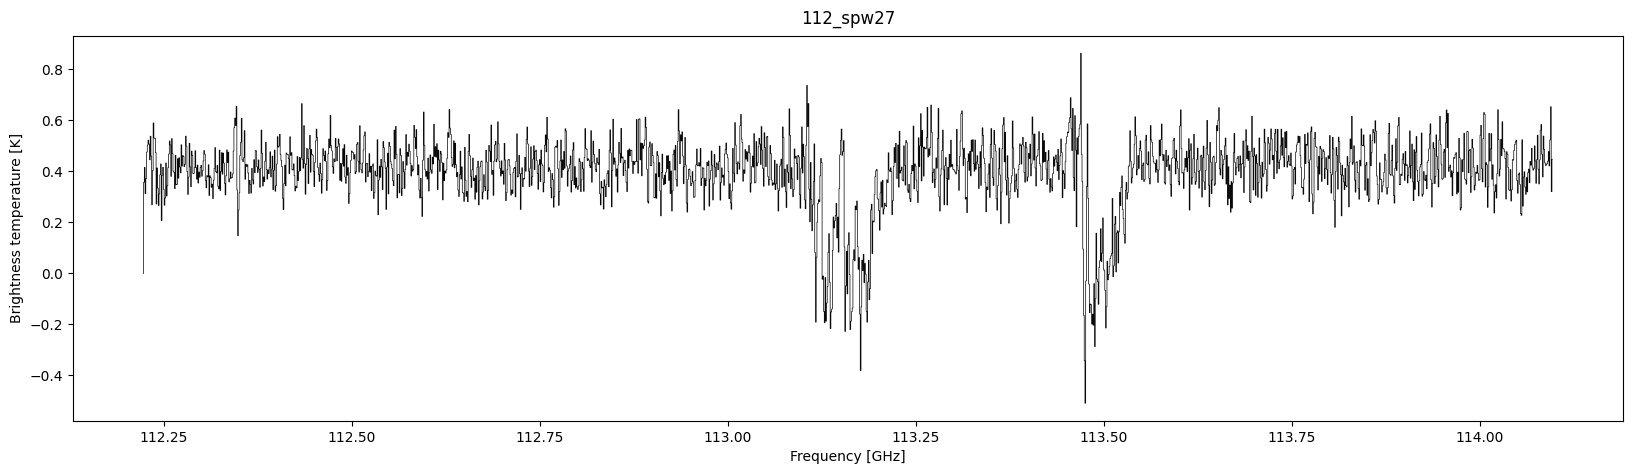

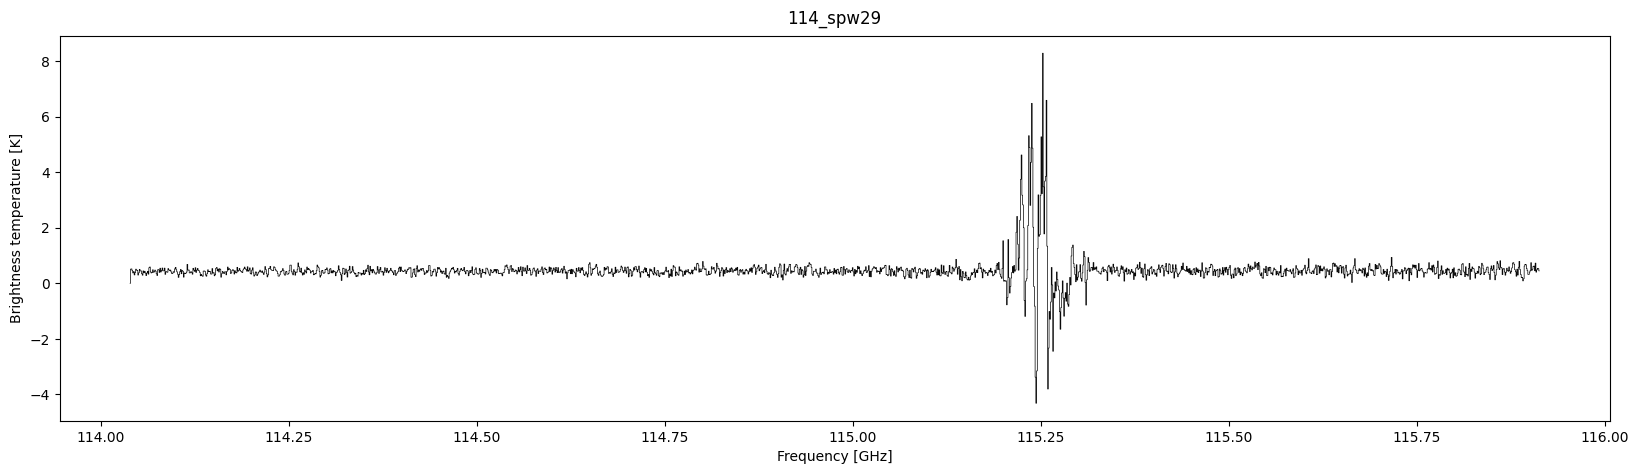

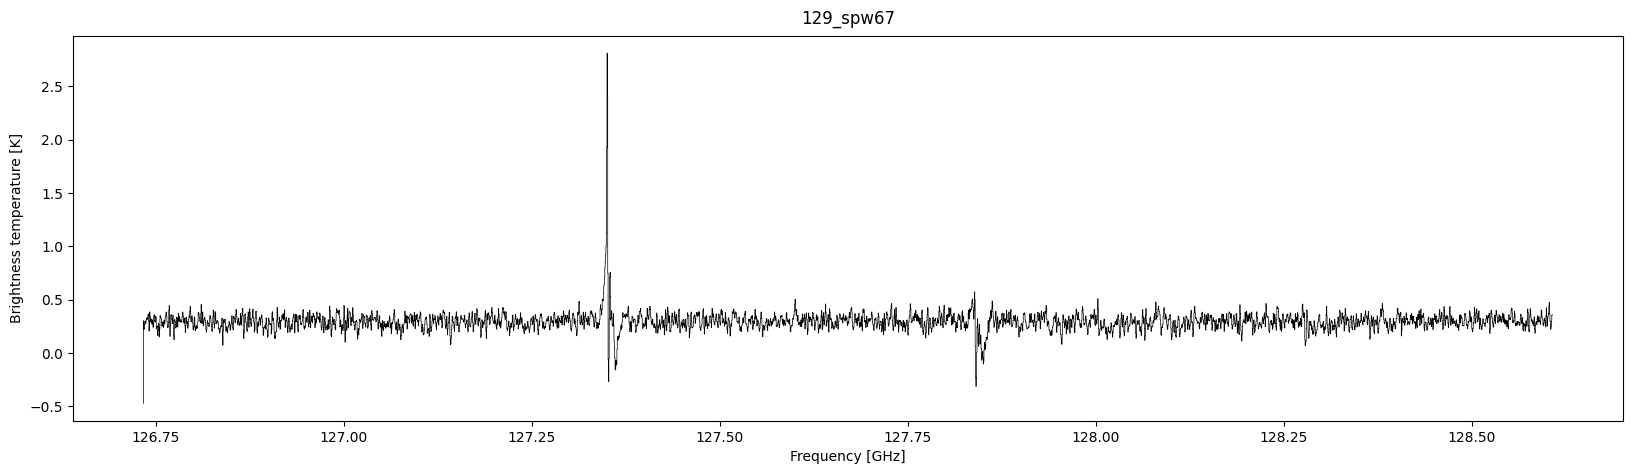

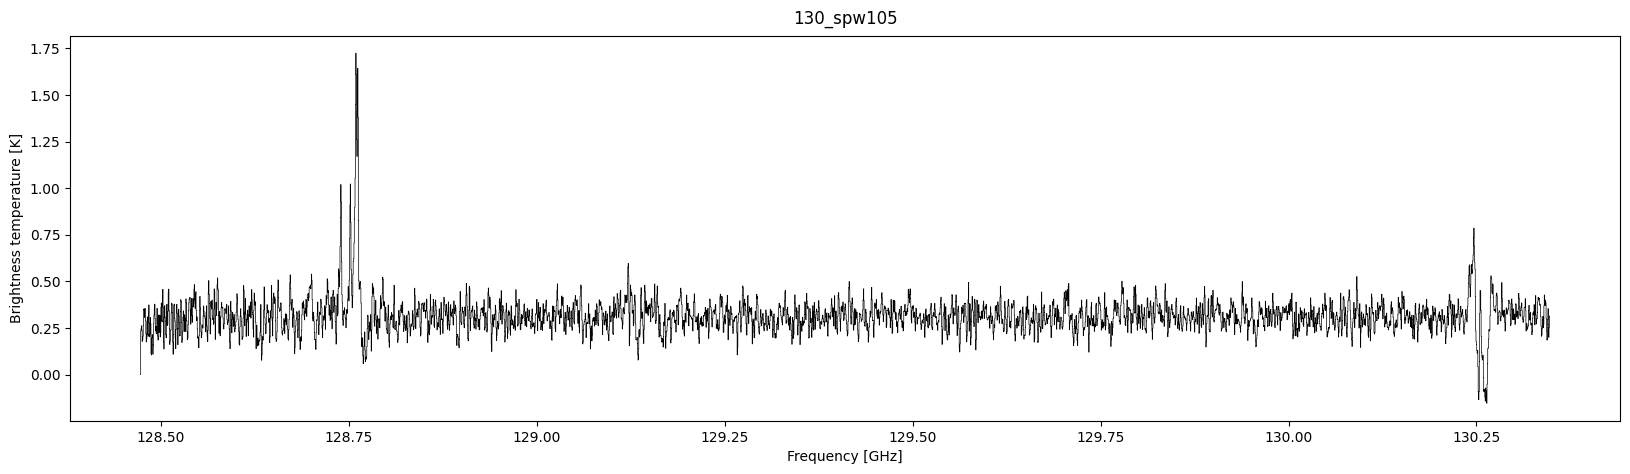

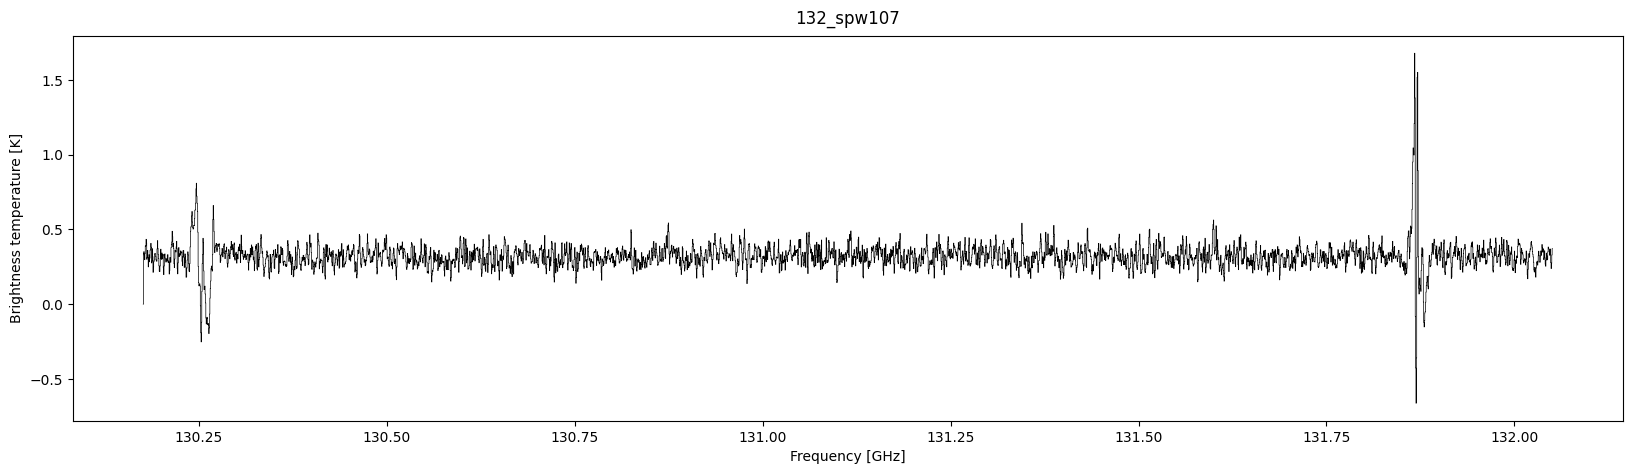

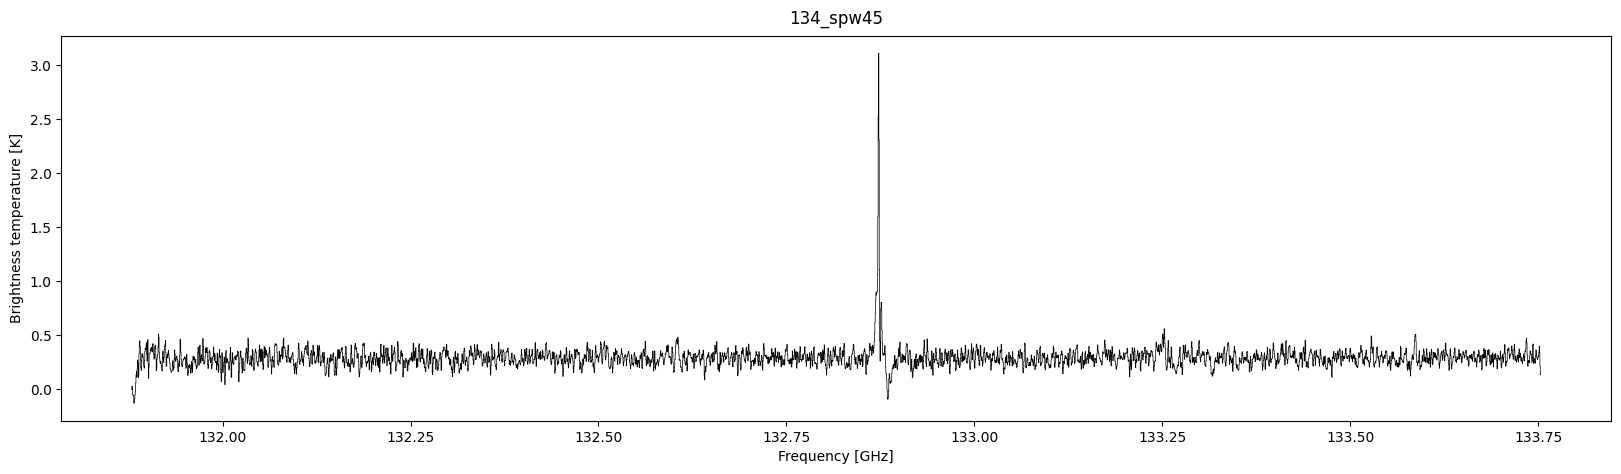

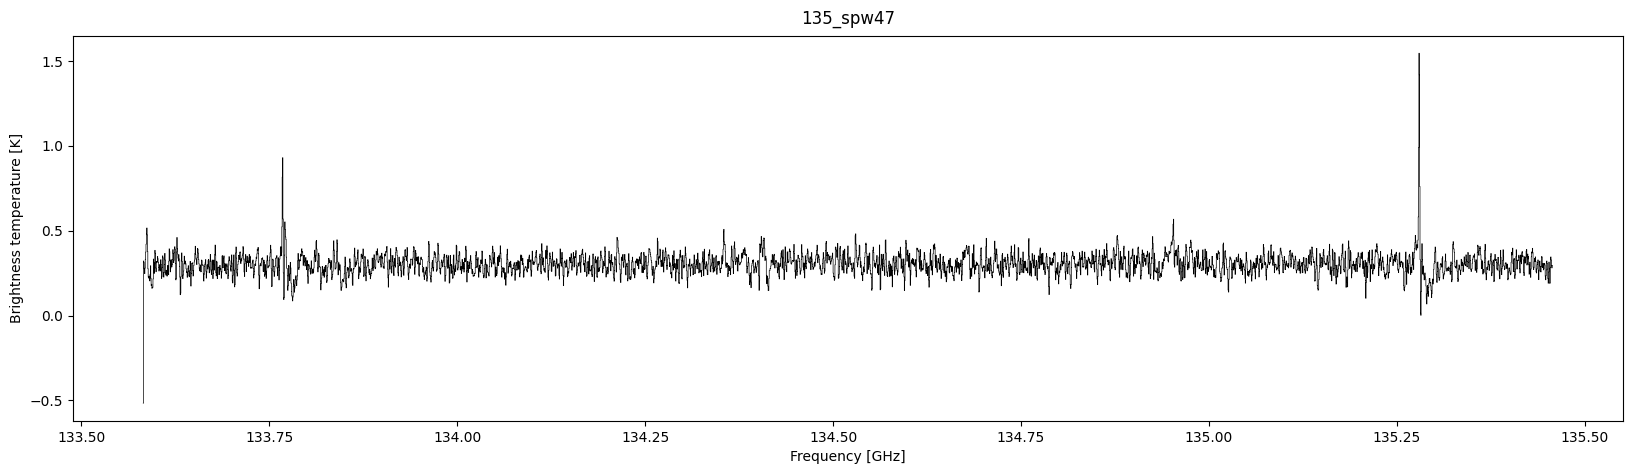

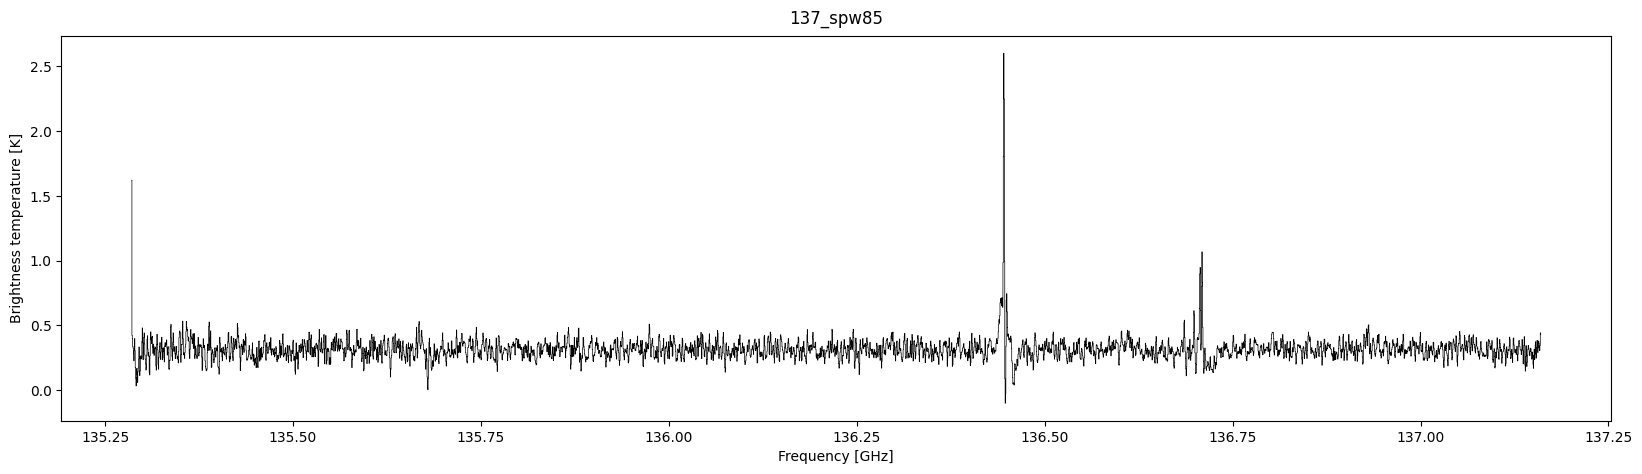

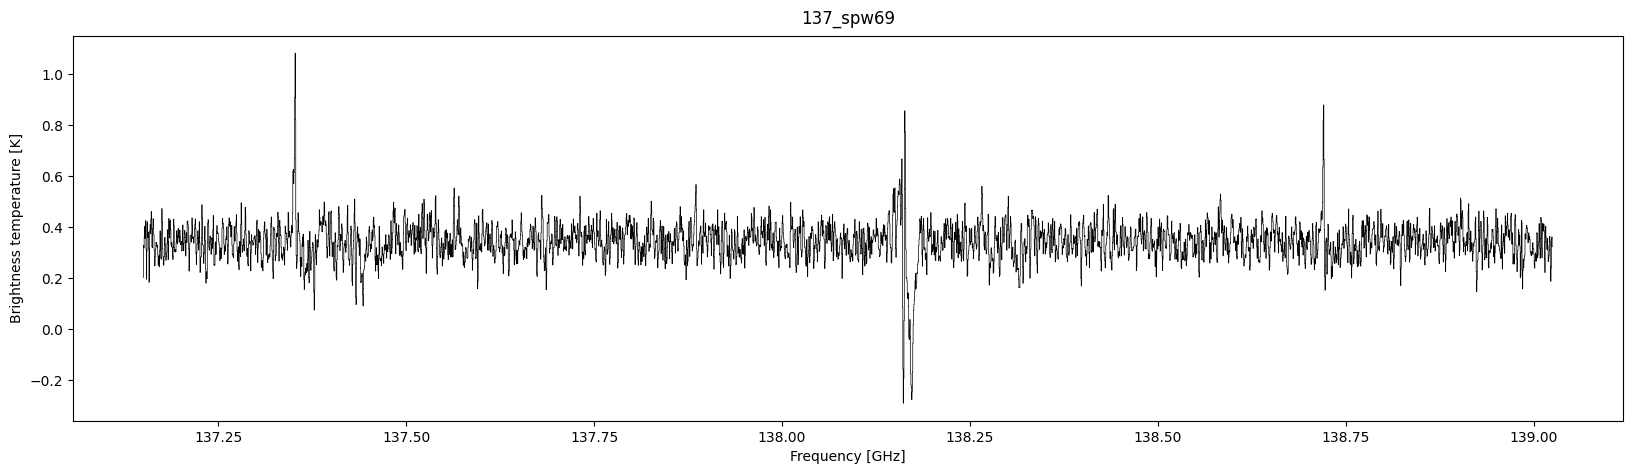

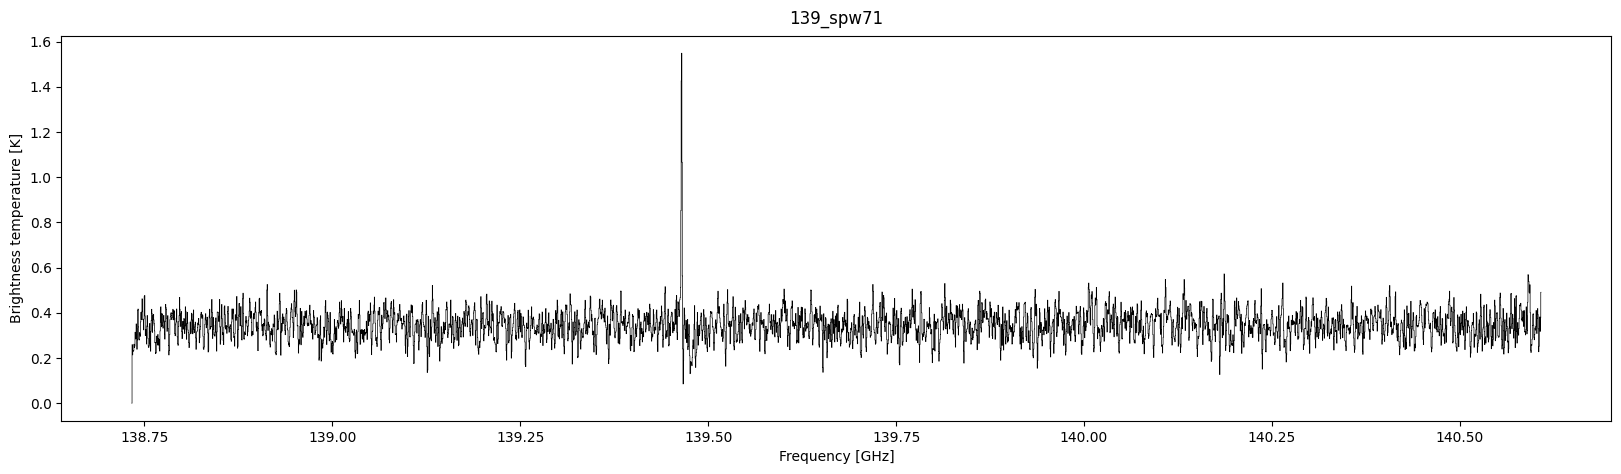

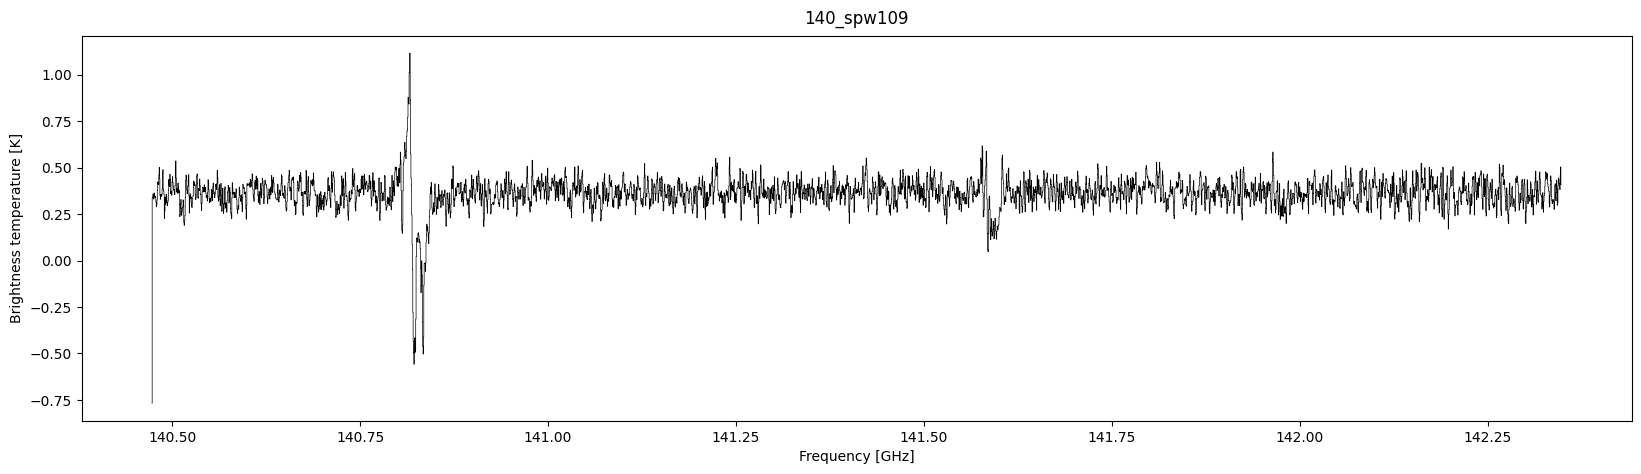

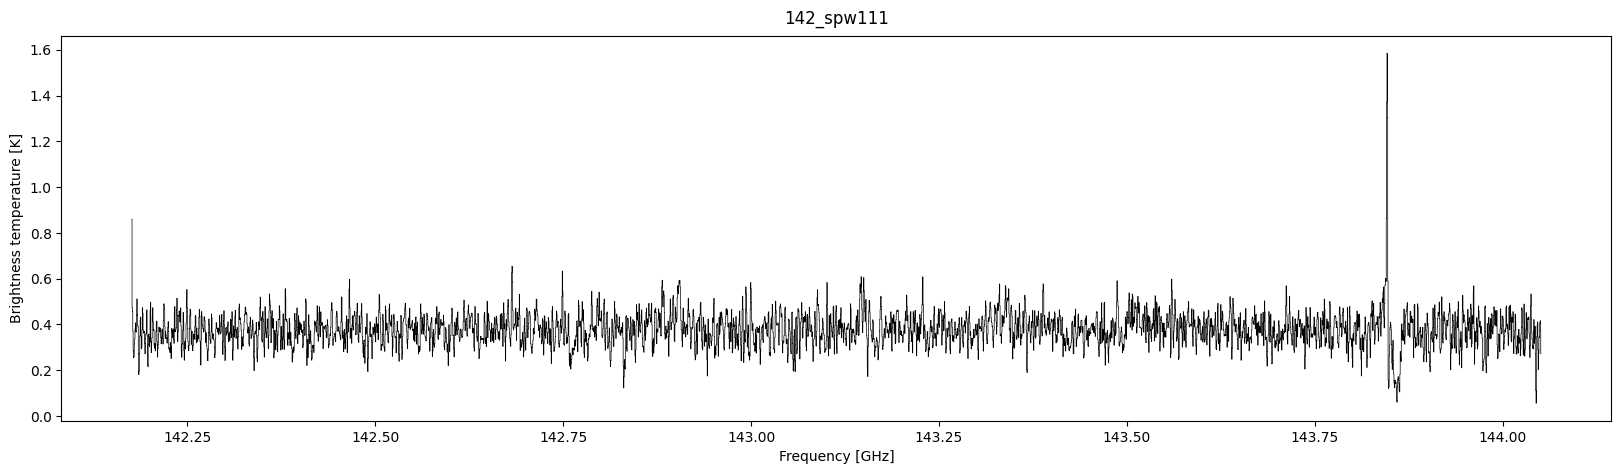

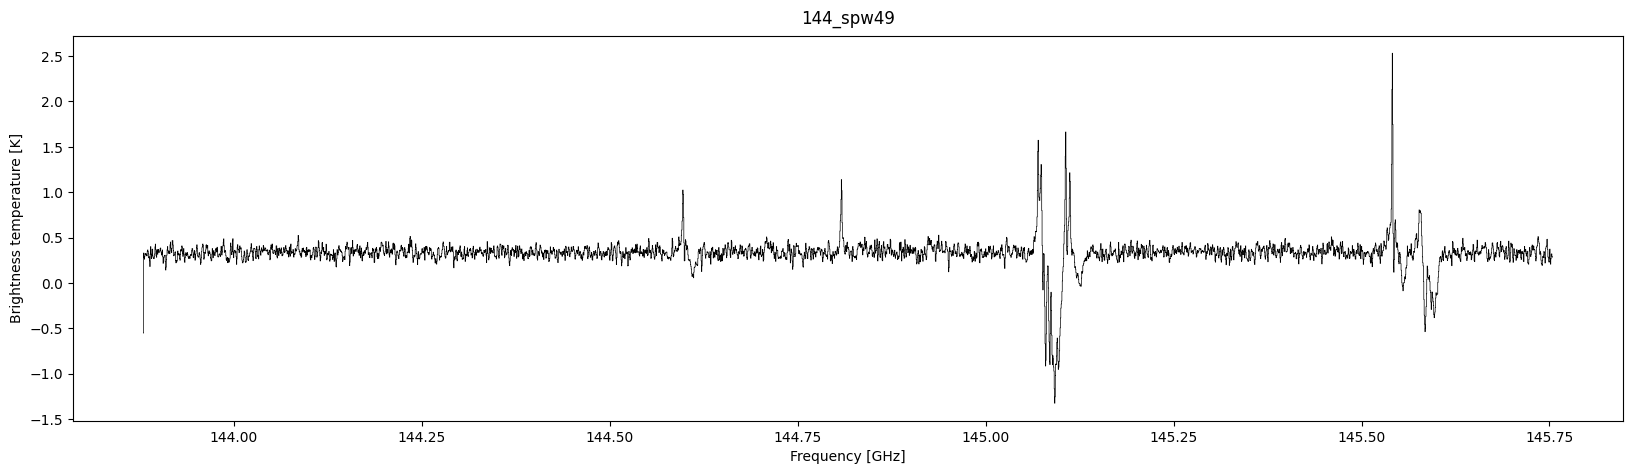

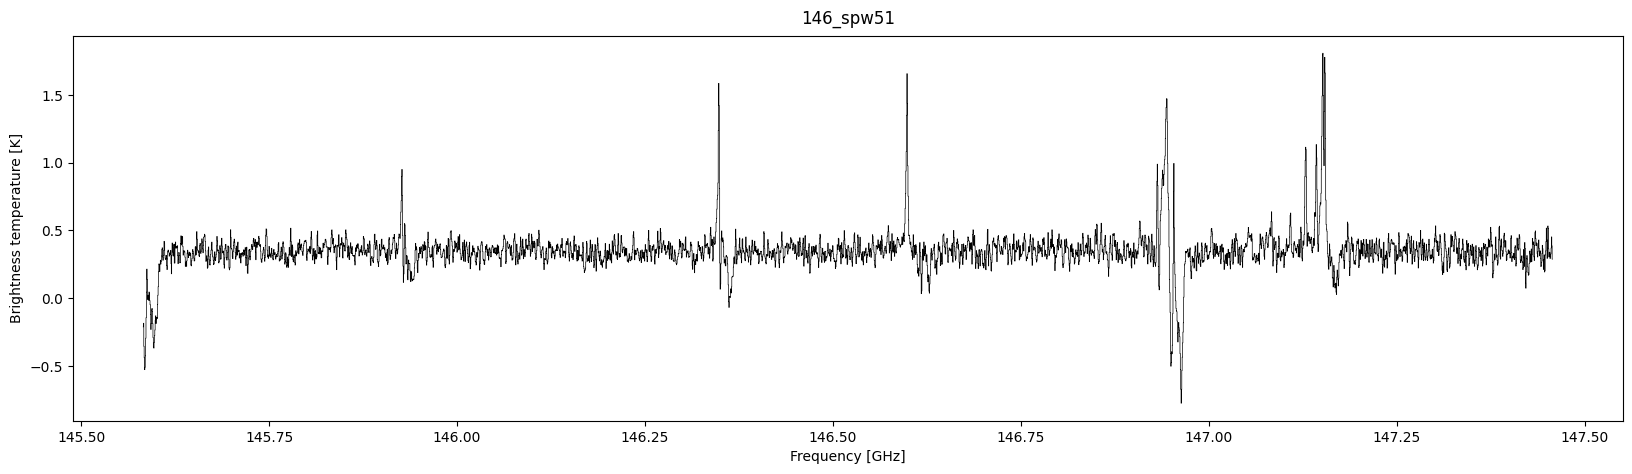

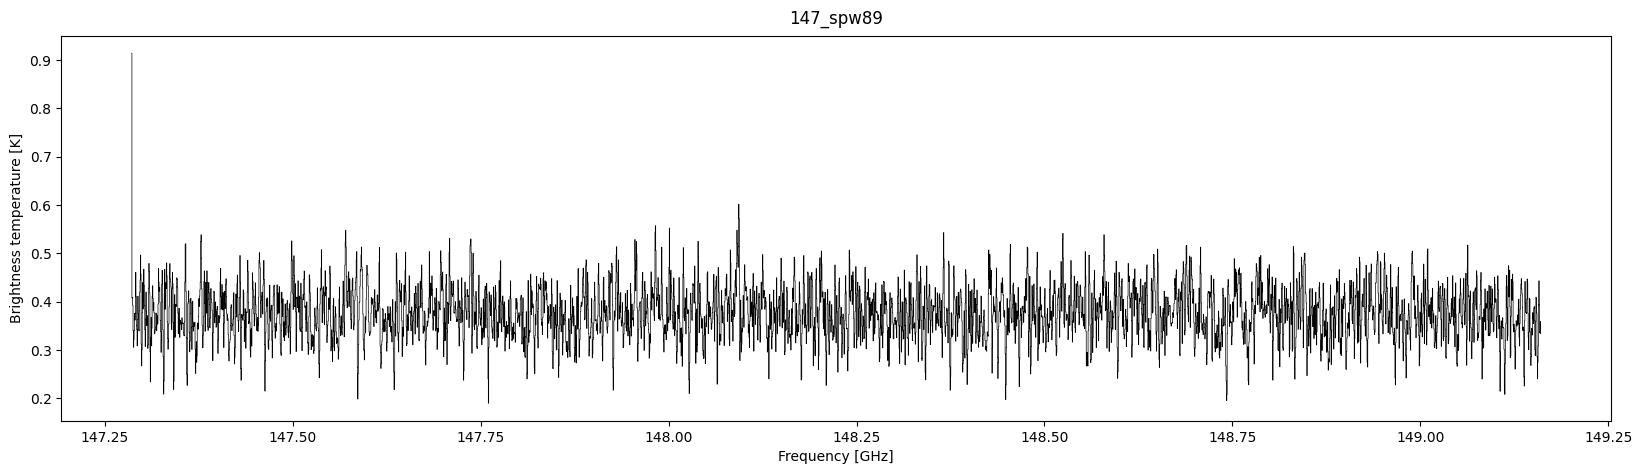

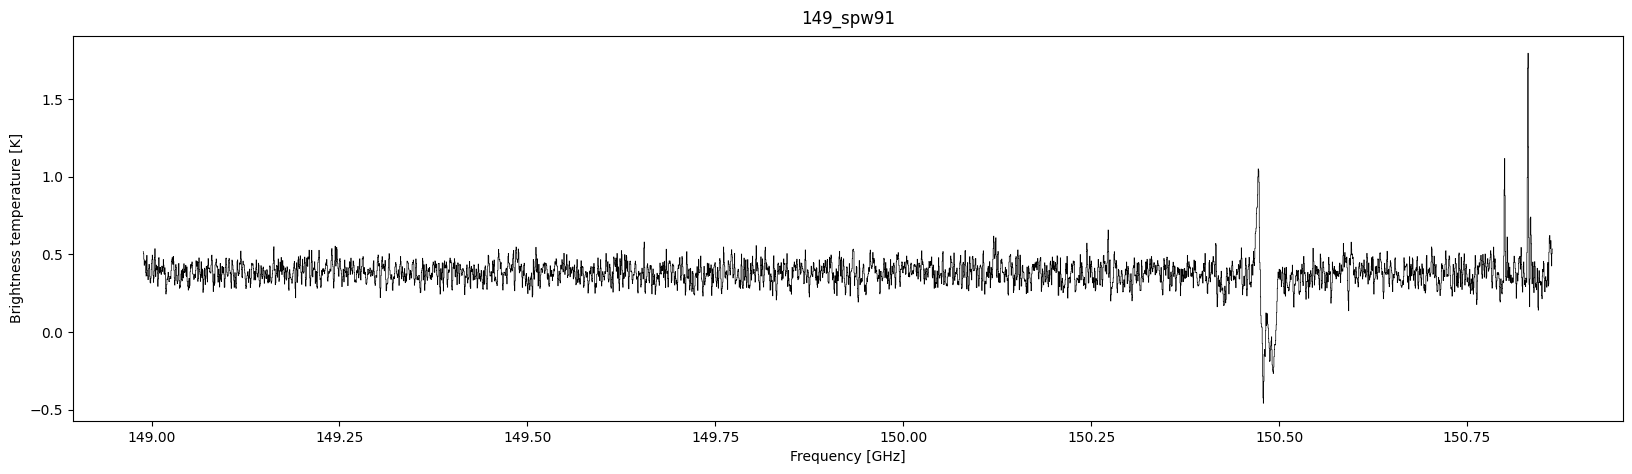

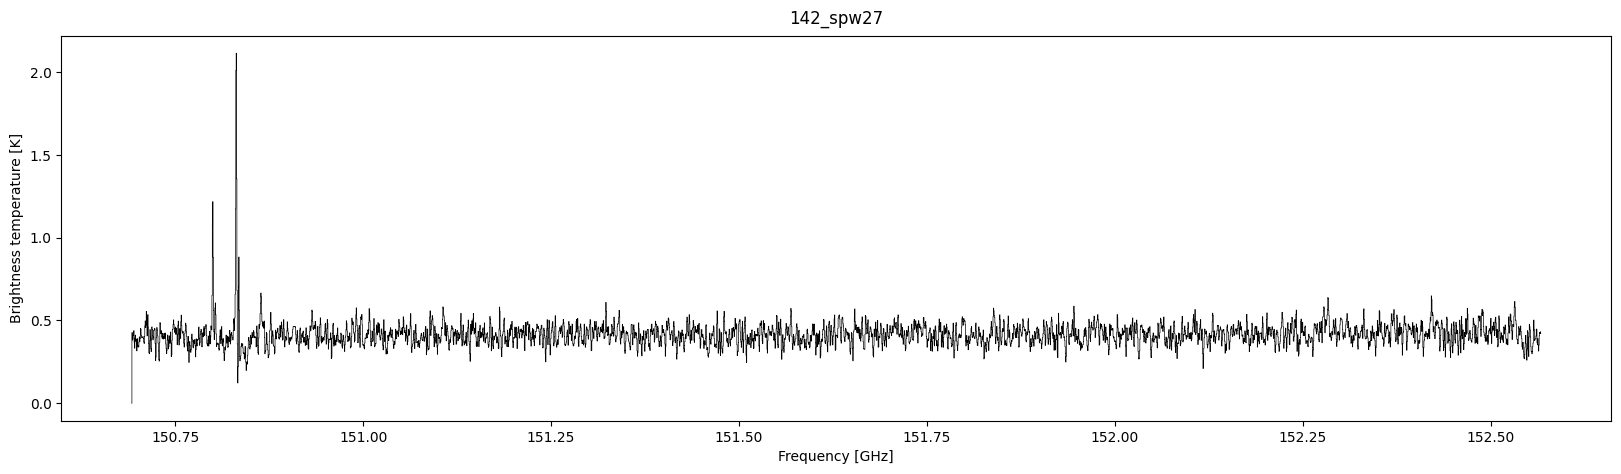

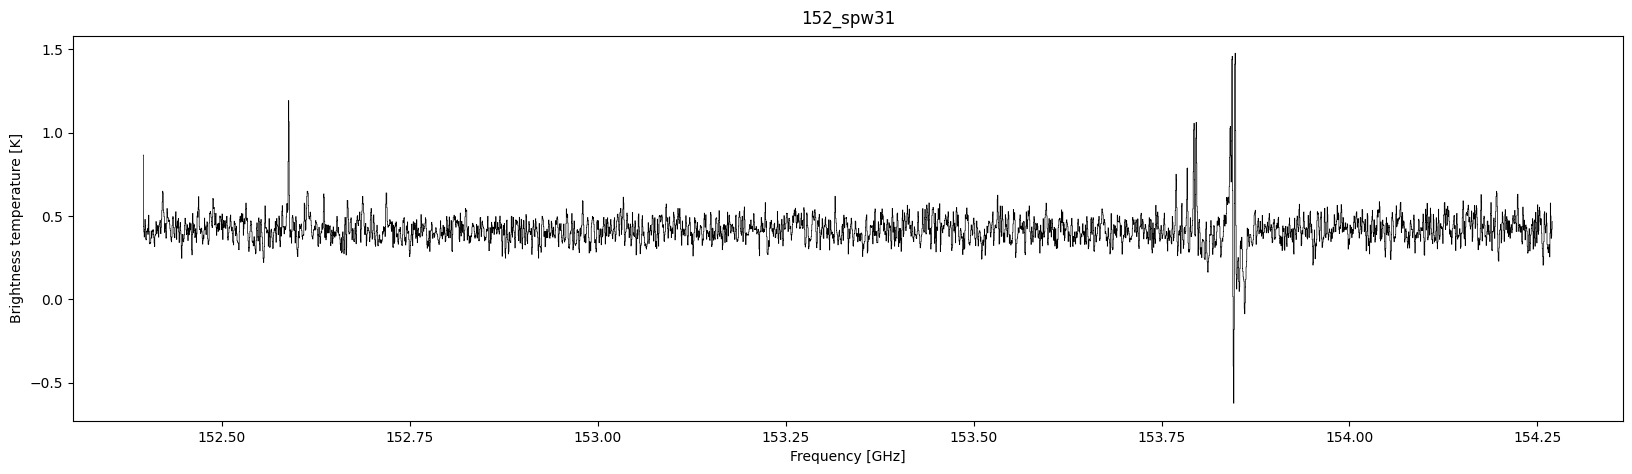

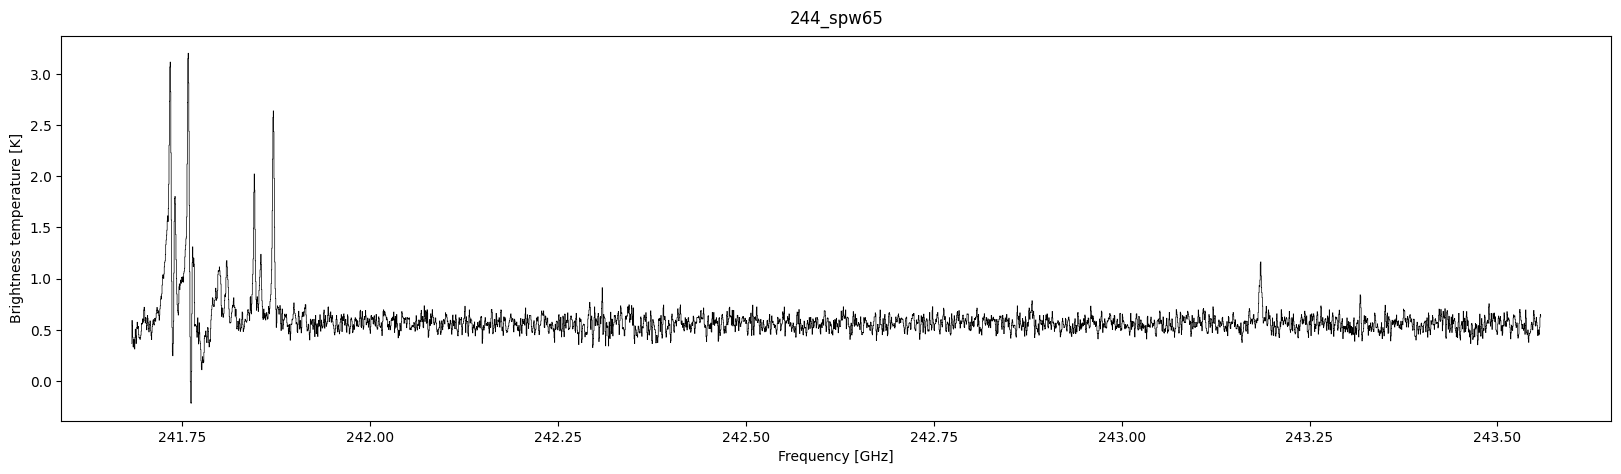

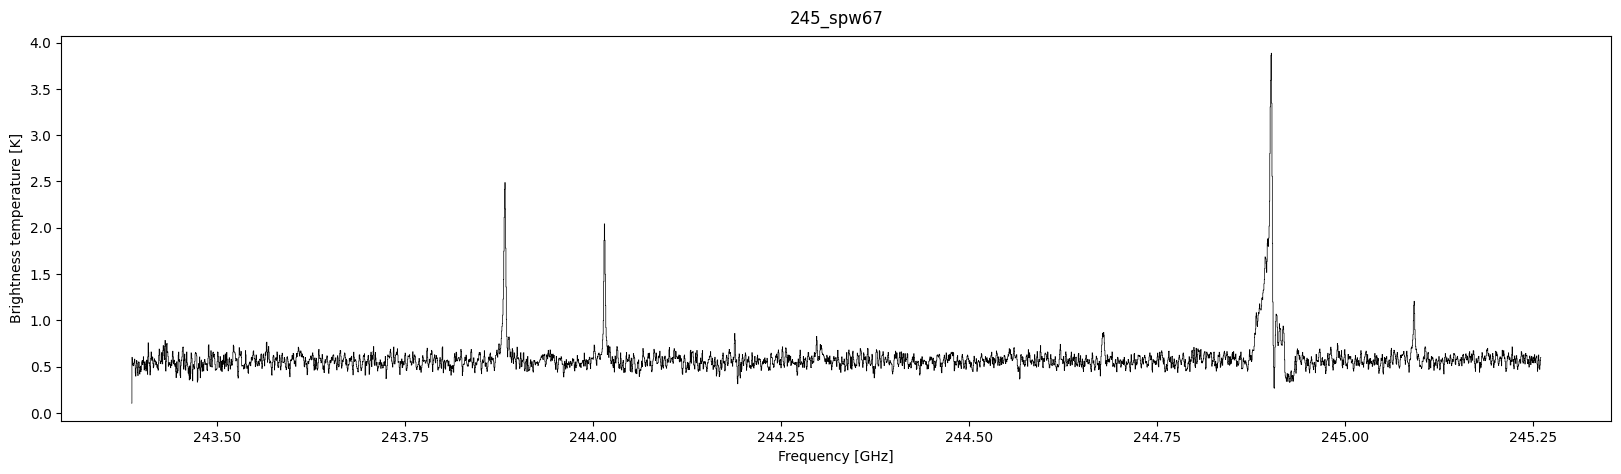

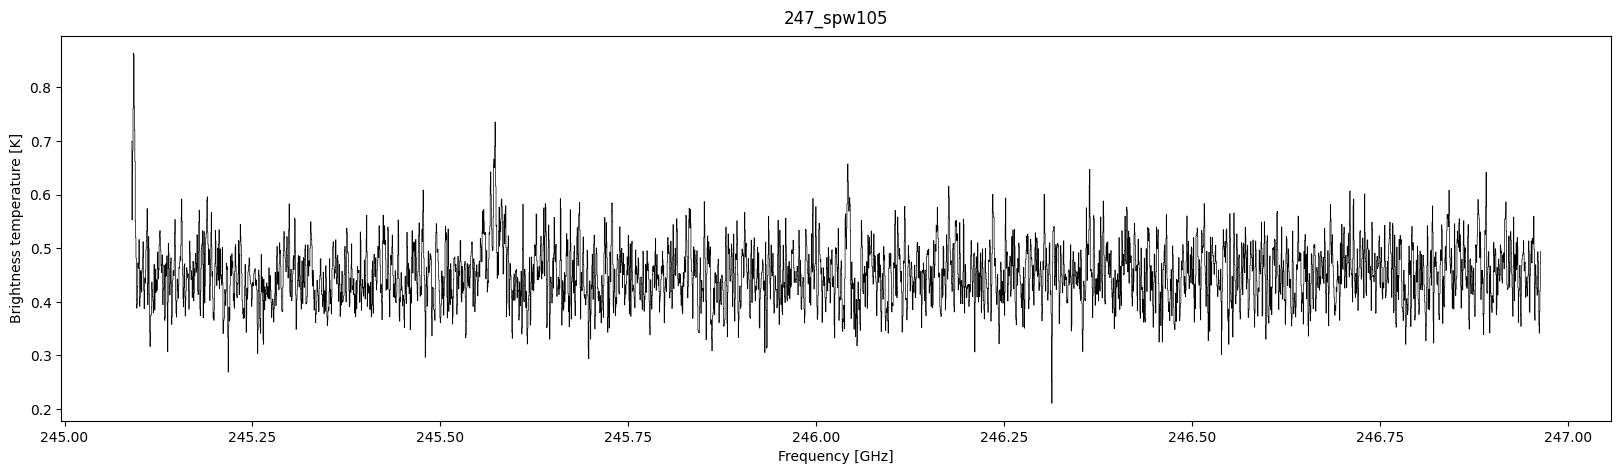

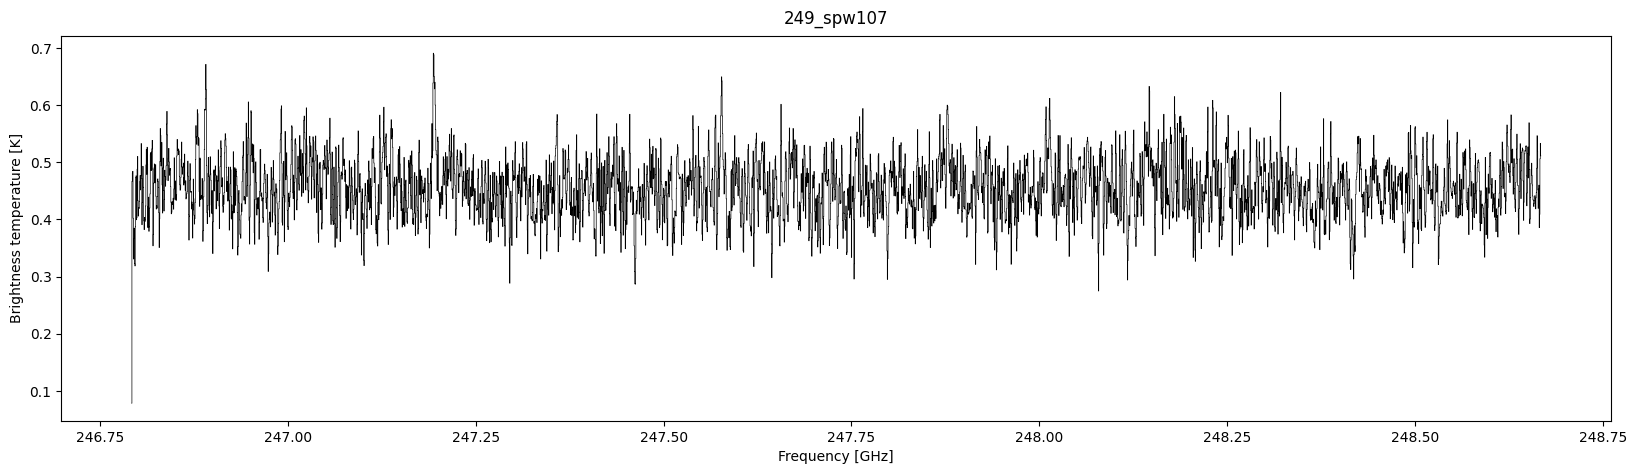

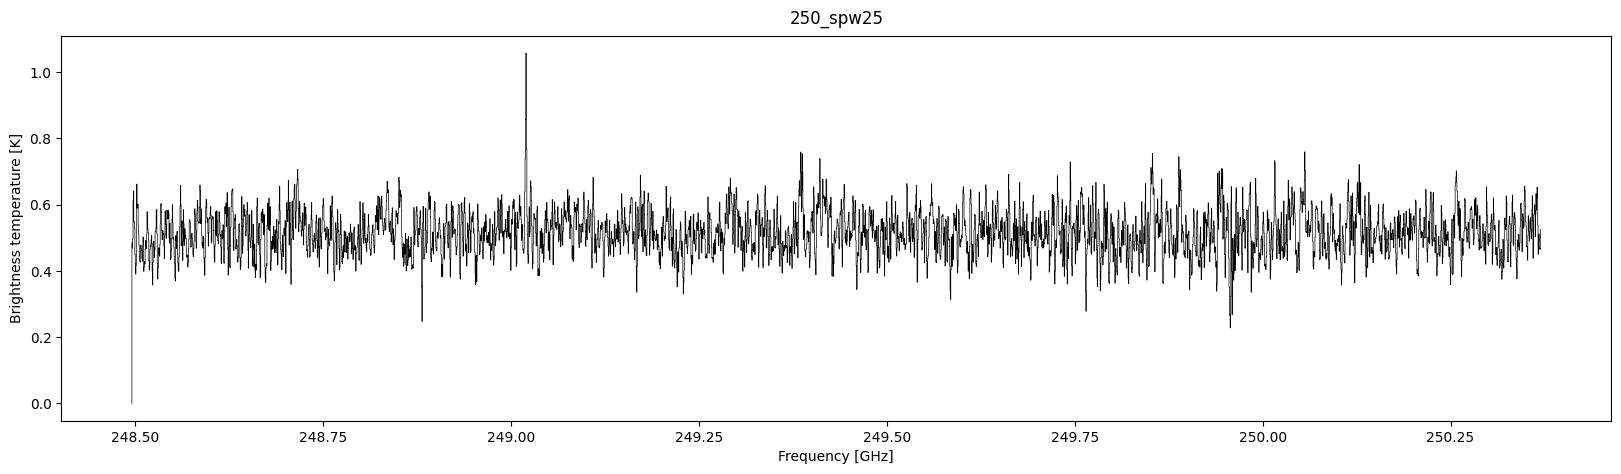

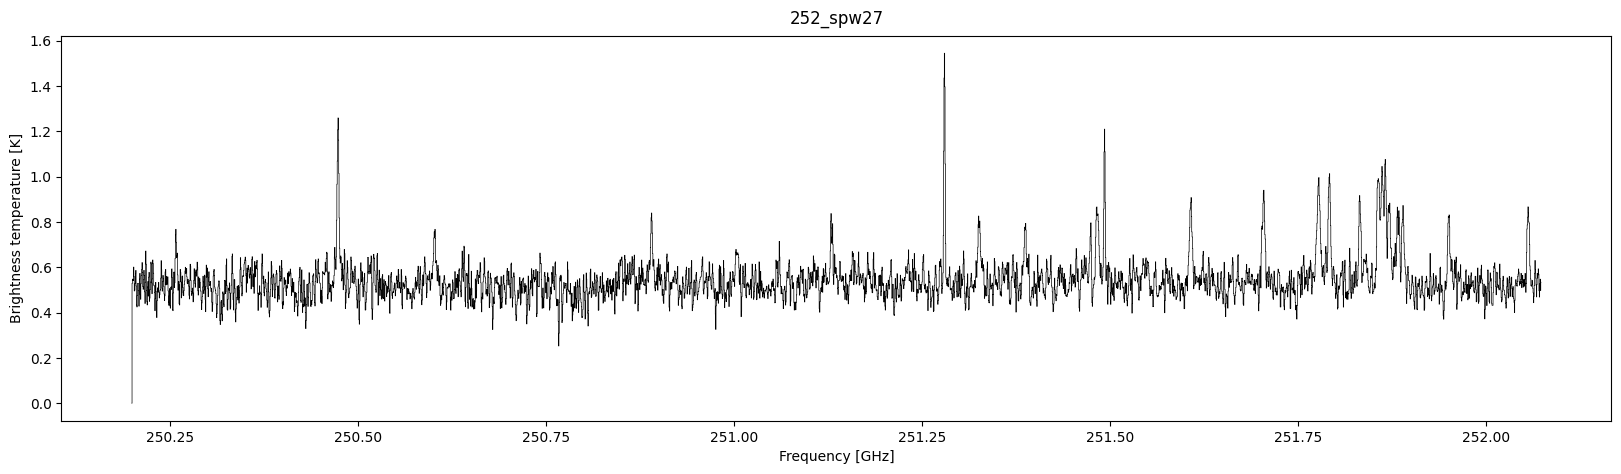

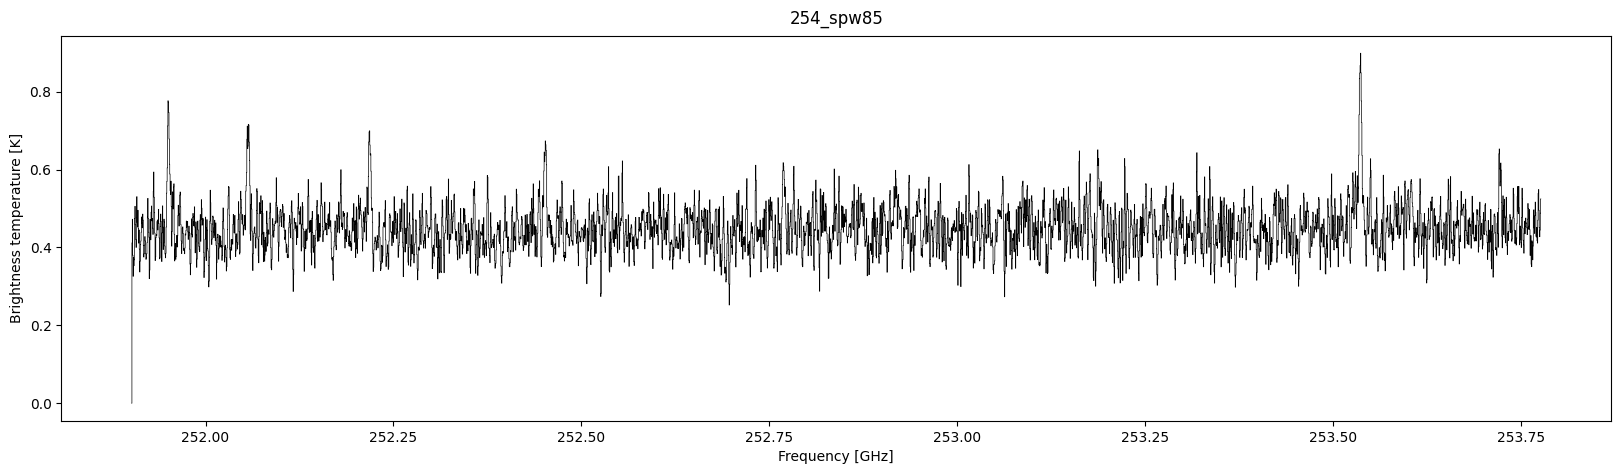

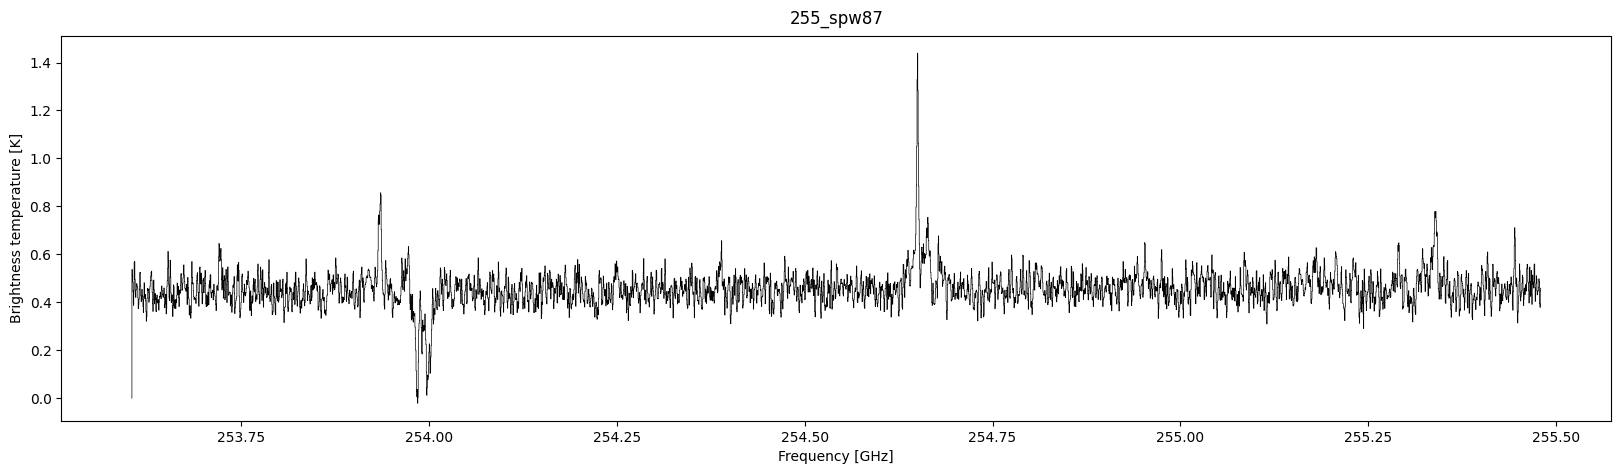

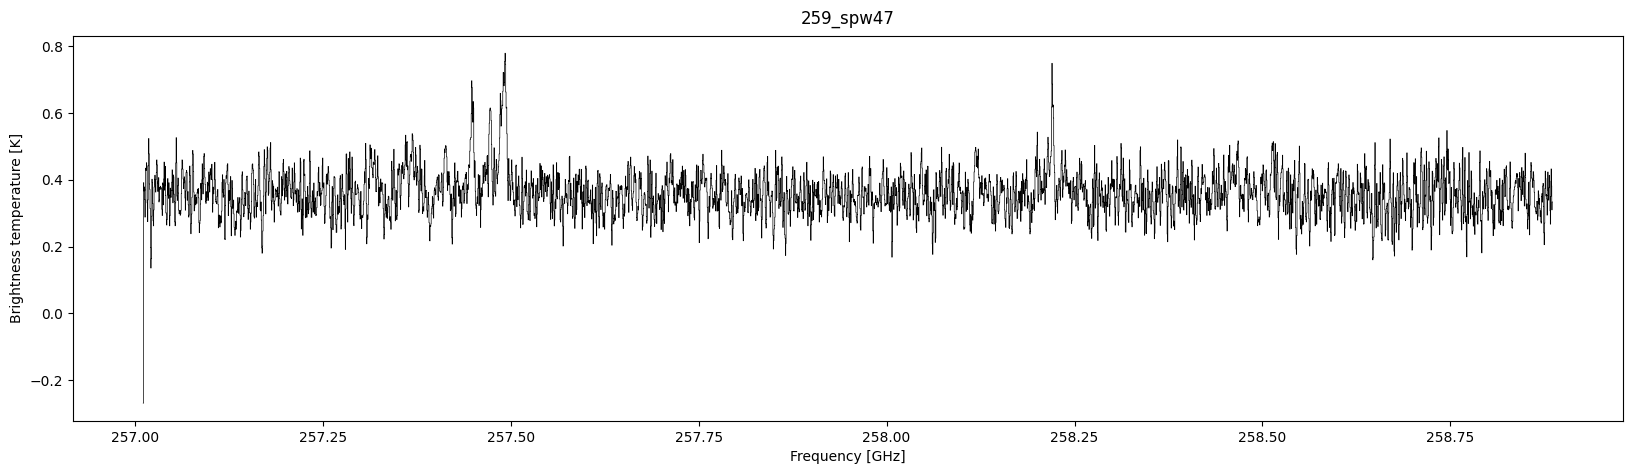

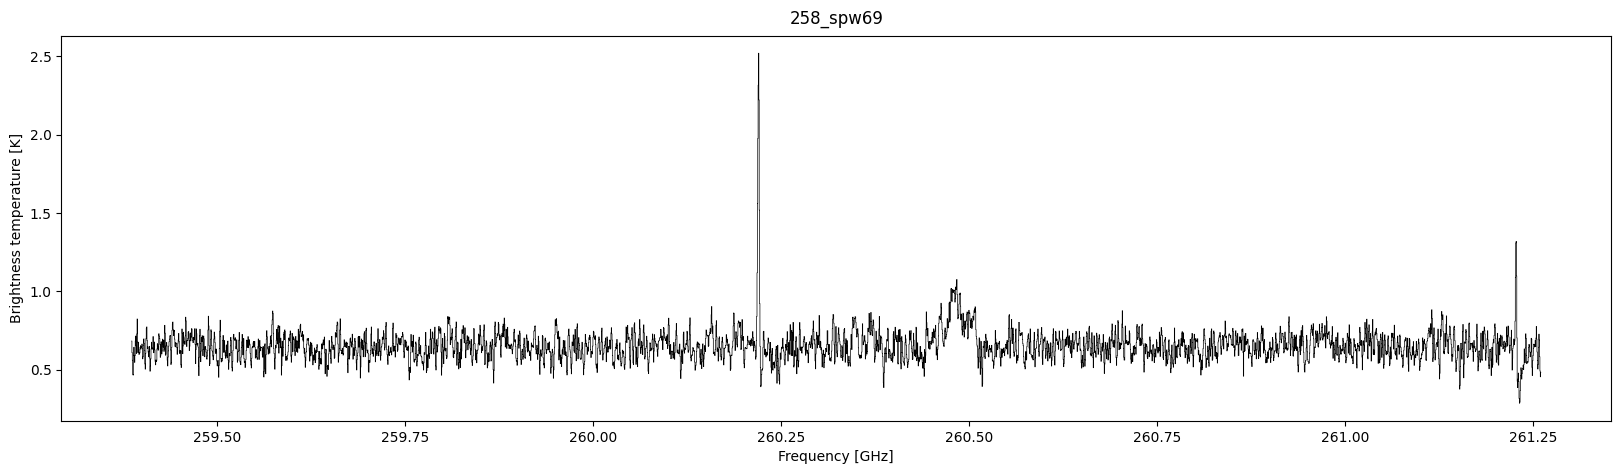

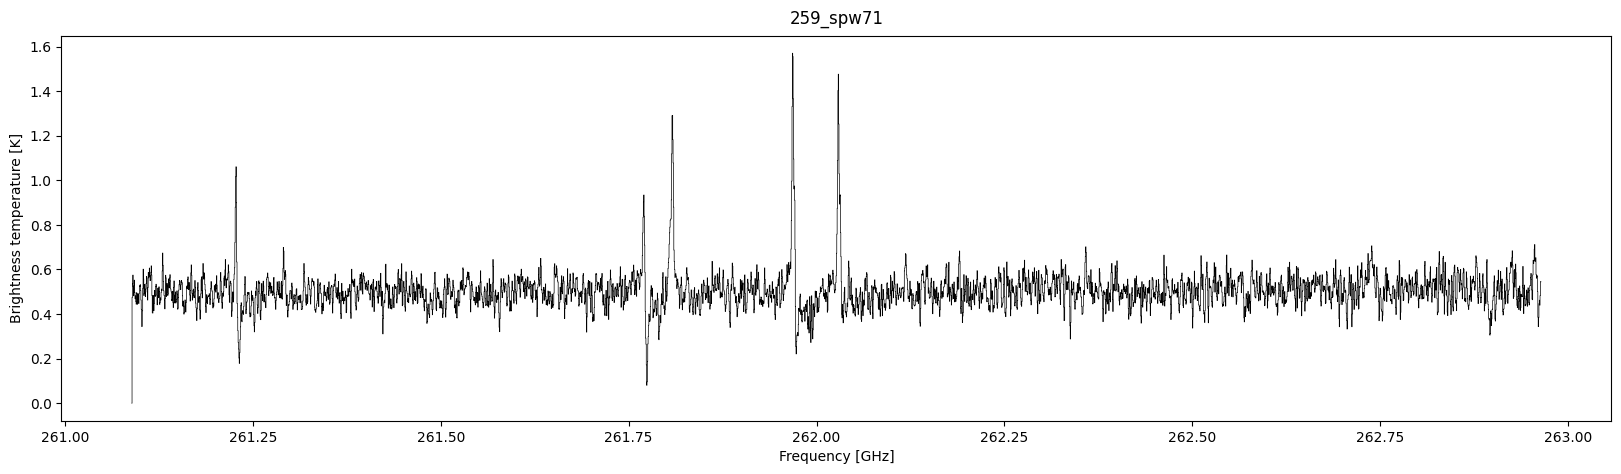

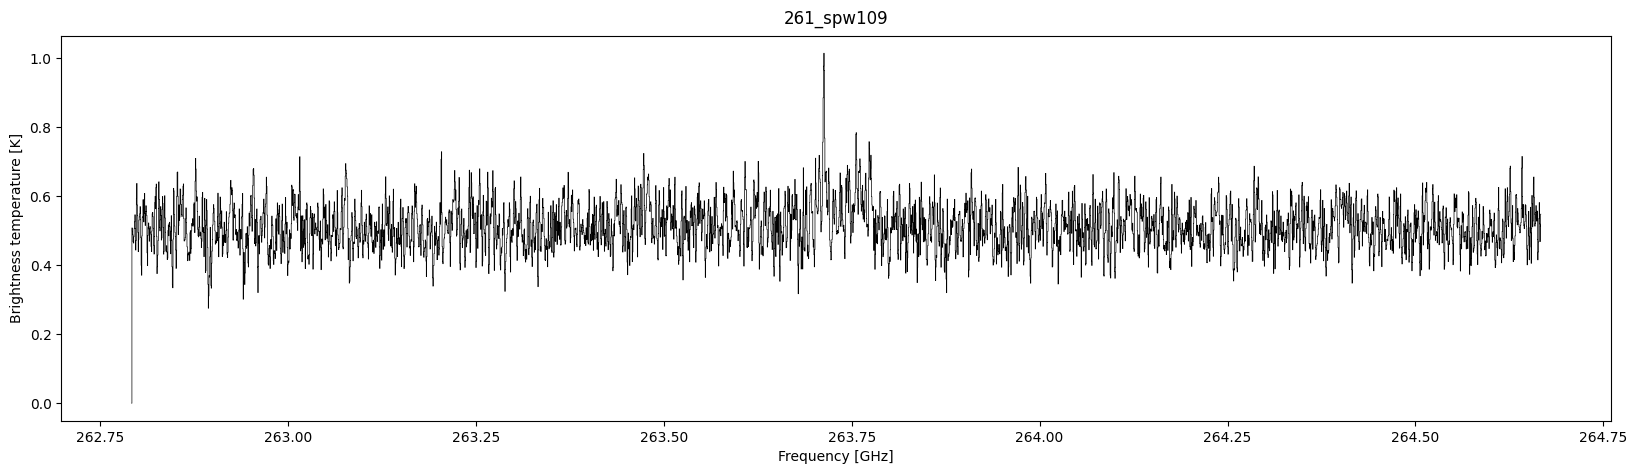

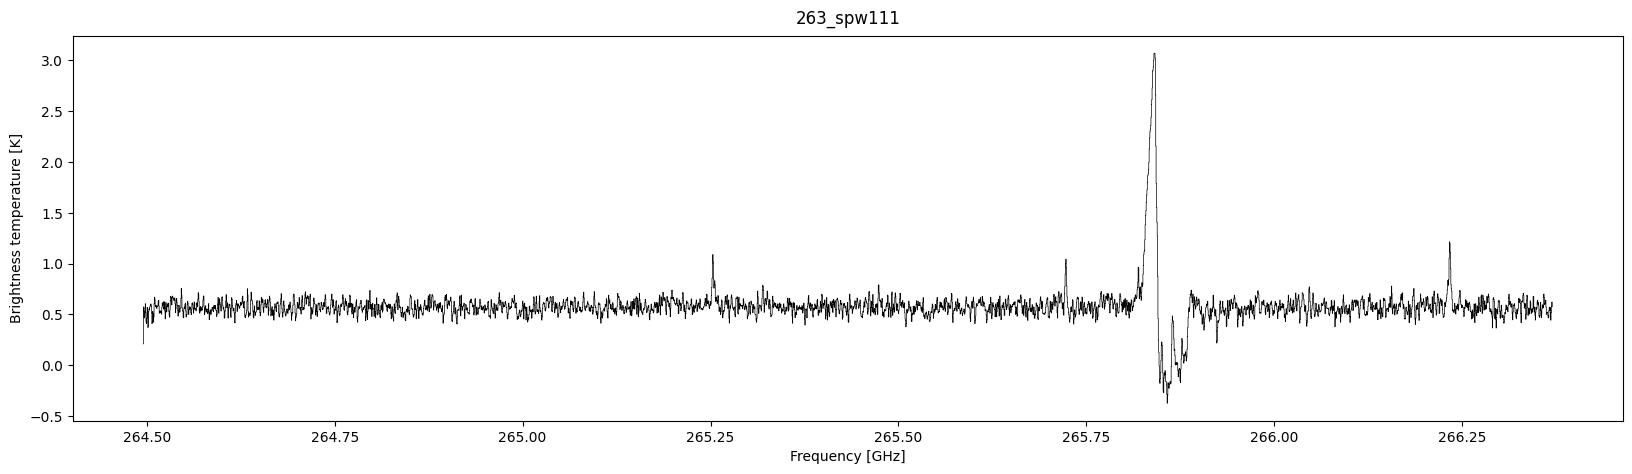

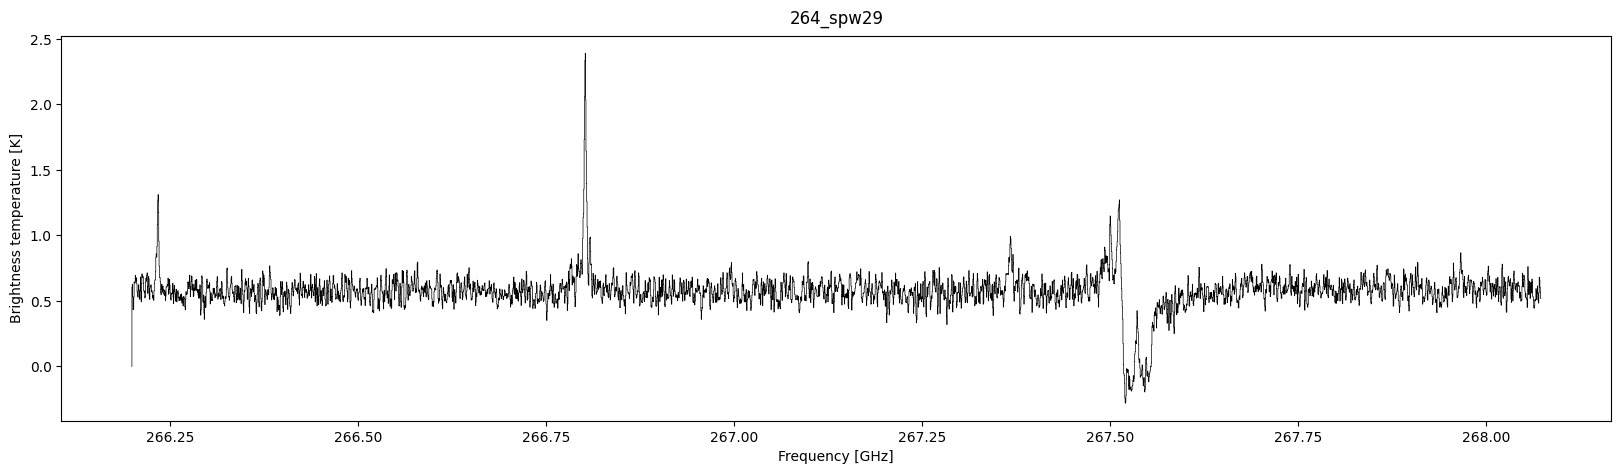

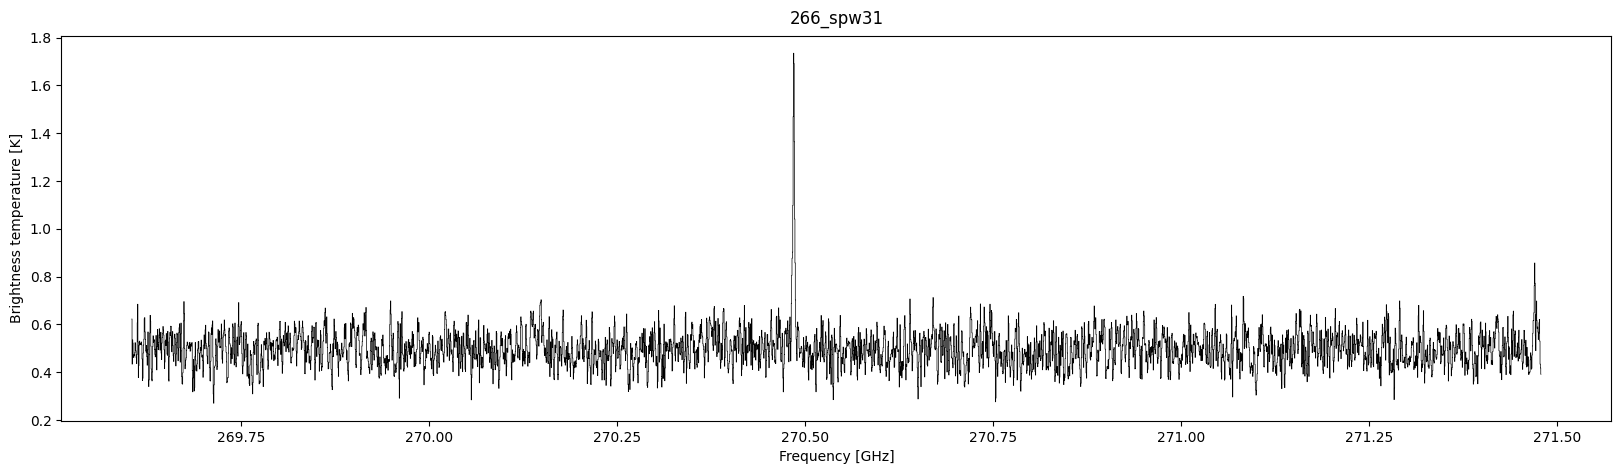

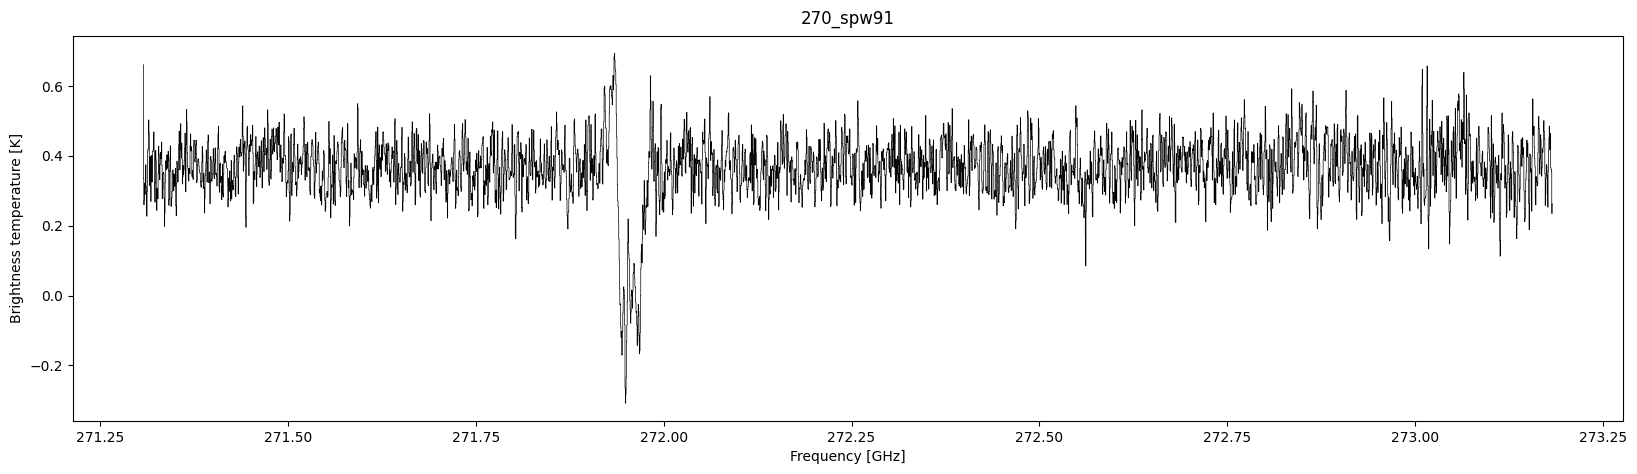

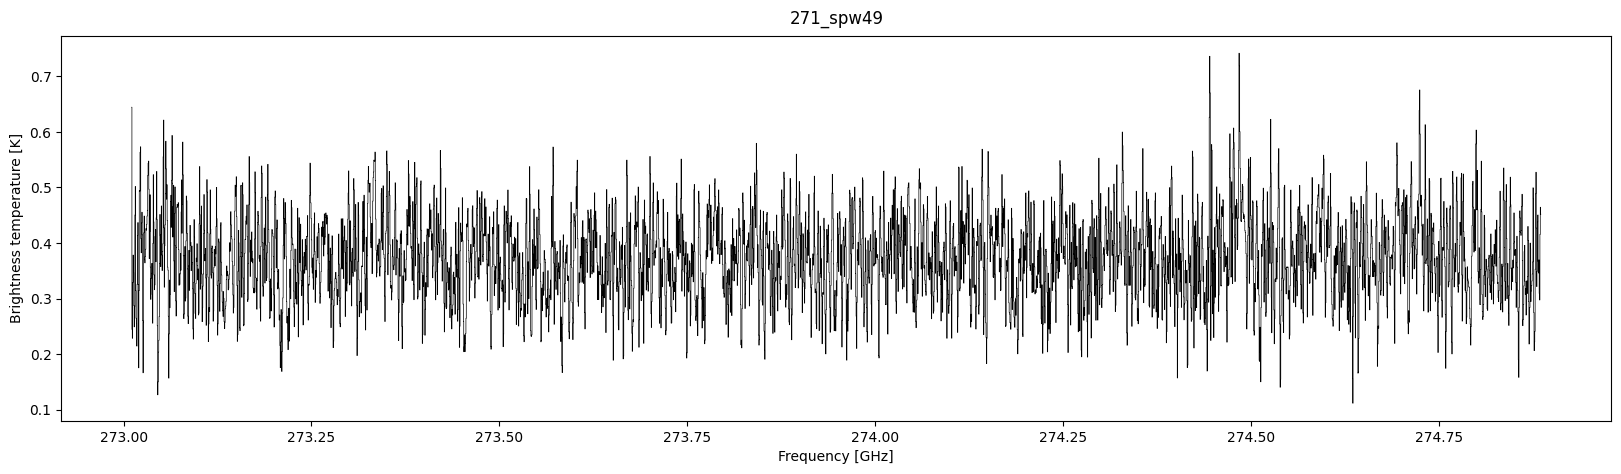

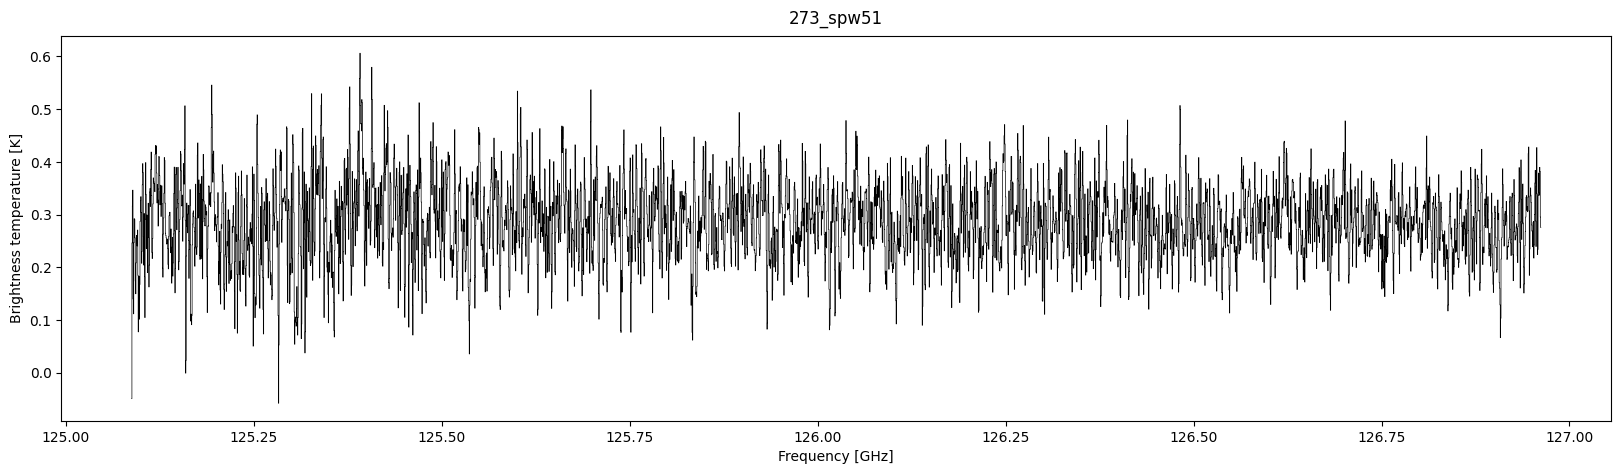

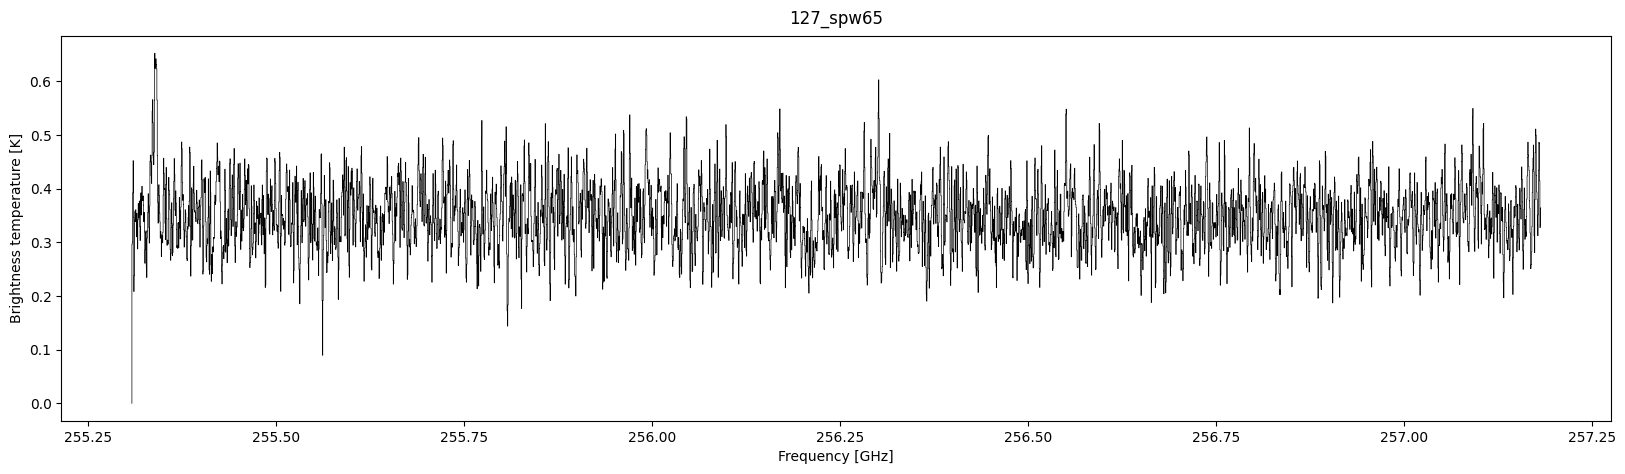

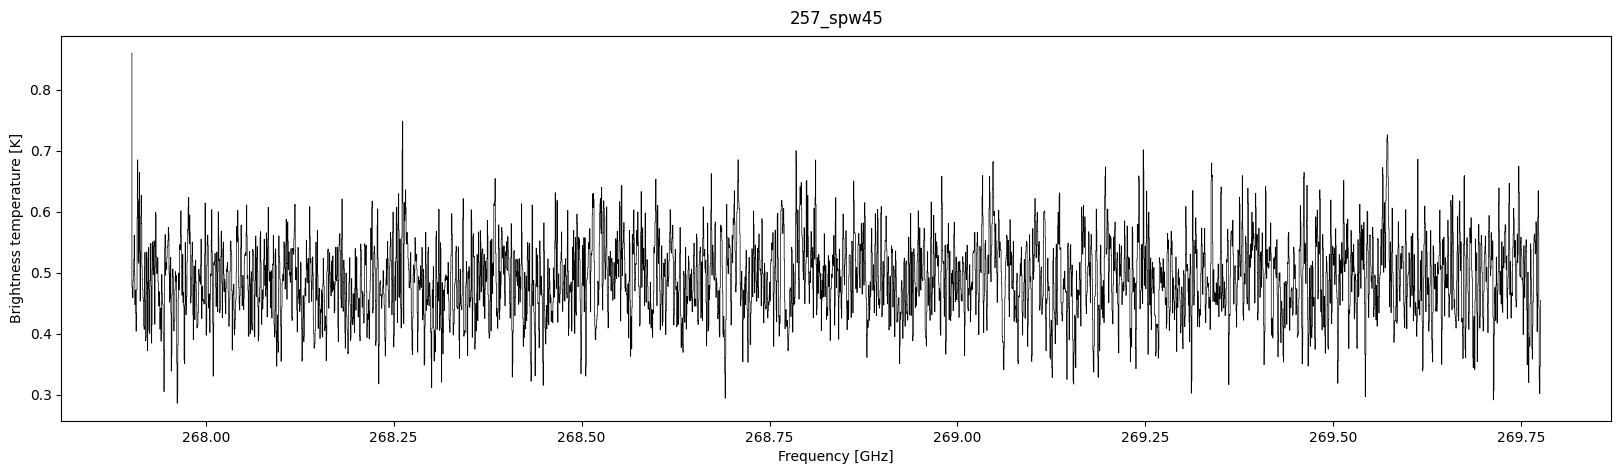

In [26]:

import matplotlib.pyplot as plt



for ind, (cube1, spectrum) in enumerate(zip(cubeList, max_spectra)):
    #debug: print(f"{ind} {cube1} {spectrum}")
    fig = plt.figure(figsize = (20, 5))
    ax = plt.subplot(1, 1, 1)
    ax.plot(cube1.spectral_axis.to(u.GHz), np.array(spectrum), linestyle = '-', color = 'k', linewidth = 0.5, drawstyle = 'steps-mid')
    ax.set_xlabel(f"Frequency [{cubeList[0].spectral_axis.to(u.GHz).unit}]")
    ax.set_ylabel(f"Brightness temperature [{max_spectra[0].unit}]")
    ax.set_title(all[ind], y = 1.01)
    plt.savefig(f"/blue/adamginsburg/plansing/core_spectra_images/{all[ind]}core_spectra.png")